# Introduction

>The purpose of exploring and analyzing the enclosed datasets is to determine if there is a trend in crime rates based on the time of day and year in various areas of Los Angeles. The data will be extracted from Data.gov, cleaned, transformed, and analyzed to draw conclusions. These conclusions may be beneficial to the Los Angeles Police Department (LAPD) for making staffing decisions based on fluctuations in officer needs throughout the day and year in relation to peak crime periods.

>Null-Hypothesis: Crime rates are stable and do not vary based on the time of day or year.

>Alternative-Hypothesis: The trend for crime rates varies based on the time of day or year.


## Contents

>- #### [Data Sources](#data-sources)
>- #### [Methodolgy](#methodology)
>- #### [Analysis](#analysis)
>- #### [Findings](#findings)
>- #### [Limitations](#limitations)
>- #### [Recommendations](#recommendations)
>- #### [Conclusion](#conclusion)



## Data Sources<a id="data-sources"></a>

>Data was sourced from Data.gov and encompasses police records detailing crime reports across various regions of Los Angeles, California. This dataset includes information such as the date and time of the crime, crime description, demographics of victims and perpetrators, crime location, weapon involvement, specific city areas of occurrence, and the corresponding police districts responsible for responding to each incident report.

> Los Angeles crime data from 2010 to 2019: https://catalog.data.gov/dataset/crime-data-from-2010-to-2019

> Los Angeles crime data from 2020 to present: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

>Los Angeles arrest records from 2020 to present: https://catalog.data.gov/dataset/arrest-data-from-2020-to-present

## Methodology<a id="methodology"></a>

>The data was downloaded from Data.gov using the links provided above for extraction and loading purposes to facilitate analysis. The data will be extracted using the Python Pandas library, subsequently cleaned to remove null values, irrelevant columns, duplicate records, correct datatypes, convert and simplify the data and time columns, and to standardize column titles for clarity and simplicity in analysis. Finally, the data will undergo transformation by integrating the three cleaned datasets into a cohesive and usable dataset.

>- #### [Extraction](#extraction)
>- #### [Exploring](#exploring)
>- #### [Cleaning](#cleaning)
>- #### [Transformation](#transformation)

## Extraction<a id="extraction"></a>

In [251]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [252]:
#Extracting data for recent crime report data.
df_recent = pd.read_csv('crime_data_recent.csv')
    
#Displays all columns and rows of a DataFrame
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

df_recent.head(50)

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1   200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2   200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3   200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4   220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   
5   231808869  04/04/2023 12:00:00 AM  12/01/2020 12:00:00 AM      2300    18   
6   230110144  04/04/2023 12:00:00 AM  07/03/2020 12:00:00 AM       900     1   
7   220314085  07/22/2022 12:00:00 AM  05/12/2020 12:00:00 AM      1110     3   
8   231309864  04/28/2023 12:00:00 AM  12/09/2020 12:00:00 AM      1400    13   
9   211904005  12/31/2020 12:00:00 AM  12/31/2020 12:00:00 AM      1220    19   
10  221804943  01/21/2022 12:00:00 AM  07/01/2020 12:00:00 AM      1335    18   
11  221908151  04/12/2022 12:00:00 AM  10/01/2020 12:00:00 AM         1    19   
12  230204214  01/05/2023 12:00:00 AM  02/01/2020 12:00:00 AM       800     2   
13  221008844  05/06/2022 12:00:00 AM  11/01/2020 12:00:00 AM       130    10   
14  230207571  03/16/2023 12:00:00 AM  01/01/2020 12:00:00 AM      1500     2   
15  230312288  06/01/2023 12:00:00 AM  02/02/2020 12:00:00 AM       315     3   
16  231805781  02/03/2023 12:00:00 AM  07/01/2020 12:00:00 AM       805    18   
17  231322474  12/24/2023 12:00:00 AM  01/09/2020 12:00:00 AM      1200    13   
18  210705560  11/27/2020 12:00:00 AM  11/27/2020 12:00:00 AM      1800     7   
19  221016258  09/20/2022 12:00:00 AM  01/01/2020 12:00:00 AM         1    10   
20  220705246  02/03/2022 12:00:00 AM  02/11/2020 12:00:00 AM      1200     7   
21  230808643  04/25/2023 12:00:00 AM  01/01/2020 12:00:00 AM       800     8   
22  231907172  03/21/2023 12:00:00 AM  03/15/2020 12:00:00 AM      1200    19   
23  232011098  06/04/2023 12:00:00 AM  07/01/2020 12:00:00 AM      1200    20   
24  200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630     4   
25  232112438  08/03/2023 12:00:00 AM  07/01/2020 12:00:00 AM      1200    21   
26  221105176  02/02/2022 12:00:00 AM  02/09/2020 12:00:00 AM      1200    11   
27  222106031  02/23/2022 12:00:00 AM  08/14/2020 12:00:00 AM      1300    21   
28  211209197  03/20/2021 12:00:00 AM  07/01/2020 12:00:00 AM      1425    12   
29  220808837  04/28/2022 12:00:00 AM  03/30/2020 12:00:00 AM      1630     8   
30  231207725  02/27/2023 12:00:00 AM  01/27/2020 12:00:00 AM       635    12   
31  231205231  01/17/2023 12:00:00 AM  01/01/2020 12:00:00 AM      1535    12   
32  231108757  05/09/2023 12:00:00 AM  05/08/2020 12:00:00 AM      2023    11   
33  221404806  01/19/2022 12:00:00 AM  01/18/2020 12:00:00 AM      1600    14   
34  220215983  09/06/2022 12:00:00 AM  05/26/2020 12:00:00 AM      1200     2   
35  211220472  09/27/2021 12:00:00 AM  11/26/2020 12:00:00 AM      2000    12   
36  211818877  10/22/2021 12:00:00 AM  03/10/2020 12:00:00 AM      1500    18   
37  221515929  10/10/2022 12:00:00 AM  04/01/2020 12:00:00 AM      1200    15   
38  230406865  03/28/2023 12:00:00 AM  06/28/2020 12:00:00 AM      1250     4   
39  231915767  10/25/2023 12:00:00 AM  09/02/2020 12:00:00 AM         1    19   
40  221016530  11/15/2022 12:00:00 AM  10/23/2020 12:00:00 AM      1735    10   
41  231210407  04/18/2023 12:00:00 AM  01/01/2020 12:00:00 AM         1    12   
42  220208037  03/30/2022 12:00:00 AM  01/01/2020 12:00:00 AM       800     2   
43  221504294  01/06/2022 12:00:00 AM  10/30/2020 12:00:00 AM         1    15   
44  221312369  06/03/2022 12:00:00 AM  12/10/2020 12:00:00 AM       700    13   
45  220911866  07/26/2022 12:00:00 AM  02/01/2020 12:00:00 AM       505     9   
46  231906599  03/03/2023 12:00:00 AM  01/14/2020 12:00:00 AM      1335    19   
47  230610629  06/02/2023 12:00:00 AM  05/31/2020 12:00:00 AM       430     6   
48  220321807  12/13/2022 12:00:00 AM  

In [253]:
#Extracting data for historical crime report data.
df_historical = pd.read_csv('crime_data_historical.csv')
    
#Displays all columns and rows of a DataFrame
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

df_historical.head(50)

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0     1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350   
1    11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45   
2    70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515   
3    90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150   
4   100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100   
5   100100506  01/05/2010 12:00:00 AM  01/04/2010 12:00:00 AM      1650   
6   100100508  01/08/2010 12:00:00 AM  01/07/2010 12:00:00 AM      2005   
7   100100509  01/09/2010 12:00:00 AM  01/08/2010 12:00:00 AM      2100   
8   100100510  01/09/2010 12:00:00 AM  01/09/2010 12:00:00 AM       230   
9   100100511  01/09/2010 12:00:00 AM  01/06/2010 12:00:00 AM      2100   
10  100100521  01/14/2010 12:00:00 AM  01/14/2010 12:00:00 AM      1445   
11  100100522  01/15/2010 12:00:00 AM  01/14/2010 12:00:00 AM      2000   
12  100100523  01/15/2010 12:00:00 AM  01/15/2010 12:00:00 AM       245   
13  100100529  01/16/2010 12:00:00 AM  01/15/2010 12:00:00 AM      1745   
14  100100531  01/16/2010 12:00:00 AM  01/15/2010 12:00:00 AM      2030   
15  100100535  01/17/2010 12:00:00 AM  01/16/2010 12:00:00 AM      1735   
16  100100552  01/23/2010 12:00:00 AM  01/23/2010 12:00:00 AM      1225   
17  100100553  01/23/2010 12:00:00 AM  01/23/2010 12:00:00 AM      1100   
18  100100555  01/23/2010 12:00:00 AM  01/23/2010 12:00:00 AM      2000   
19  100100561  01/26/2010 12:00:00 AM  01/26/2010 12:00:00 AM      1820   
20  100100562  01/28/2010 12:00:00 AM  01/28/2010 12:00:00 AM      2345   
21  100100564  01/30/2010 12:00:00 AM  01/29/2010 12:00:00 AM      1630   
22  100100570  01/31/2010 12:00:00 AM  01/31/2010 12:00:00 AM       130   
23  100100571  01/31/2010 12:00:00 AM  01/31/2010 12:00:00 AM      1000   
24  100100572  02/01/2010 12:00:00 AM  01/31/2010 12:00:00 AM      1700   
25  100100573  02/01/2010 12:00:00 AM  01/31/2010 12:00:00 AM      2200   
26  100100574  02/01/2010 12:00:00 AM  01/31/2010 12:00:00 AM      1930   
27  100100575  02/01/2010 12:00:00 AM  01/31/2010 12:00:00 AM      1720   
28  100100578  02/05/2010 12:00:00 AM  02/03/2010 12:00:00 AM      1255   
29  100100580  02/02/2010 12:00:00 AM  02/01/2010 12:00:00 AM      1355   
30  100100581  02/05/2010 12:00:00 AM  02/05/2010 12:00:00 AM      1425   
31  100100586  02/06/2010 12:00:00 AM  02/06/2010 12:00:00 AM       110   
32  100100587  02/05/2010 12:00:00 AM  02/05/2010 12:00:00 AM      2030   
33  100100591  02/10/2010 12:00:00 AM  02/08/2010 12:00:00 AM      1625   
34  100100592  02/08/2010 12:00:00 AM  02/08/2010 12:00:00 AM      1800   
35  100100608  02/11/2010 12:00:00 AM  02/10/2010 12:00:00 AM      1900   
36  100100610  02/11/2010 12:00:00 AM  02/10/2010 12:00:00 AM      1800   
37  100100616  02/11/2010 12:00:00 AM  02/11/2010 12:00:00 AM      1515   
38  100100622  02/13/2010 12:00:00 AM  02/13/2010 12:00:00 AM        55   
39  100100623  02/13/2010 12:00:00 AM  02/13/2010 12:00:00 AM       150   
40  100100628  02/15/2010 12:00:00 AM  02/14/2010 12:00:00 AM      1500   
41  100100630  02/15/2010 12:00:00 AM  02/15/2010 12:00:00 AM       100   
42  100100632  02/16/2010 12:00:00 AM  02/16/2010 12:00:00 AM      1540   
43  100100633  02/17/2010 12:00:00 AM  02/17/2010 12:00:00 AM      1725   
44  100100634  02/20/2010 12:00:00 AM  02/19/2010 12:00:00 AM      2040   
45  100100635  02/20/2010 12:00:00 AM  02/19/2010 12:00:00 AM      2030   
46  100100638  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM       100   
47  100100639  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM       230   
48  100100642  02/21/2010 12:00:00 AM  02/21/2010 12:00:00 AM       500   
49  100100650  02/25/2010 12:00:00 AM  02/25/2010 12:00:00 AM        30   

    AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0      13     Newton         1385         2     900   
1      14    Pacific         1485         2     740   
2      13     New

In [254]:
#Extracting data for recent arrest report data.
df_arrests = pd.read_csv('Arrest_Data_recent.csv')

#Displays all columns and rows of a DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_arrests.head(50)

Report ID Report Type             Arrest Date    Time  Area ID  \
0   231413977         RFC  07/13/2023 12:00:00 AM  2330.0       14   
1   231715213         RFC  09/01/2023 12:00:00 AM  2300.0       17   
2   230612568         RFC  07/14/2023 12:00:00 AM  2150.0        6   
3   230119897         RFC  09/13/2023 12:00:00 AM  1332.0        1   
4   230214008         RFC  07/04/2023 12:00:00 AM  1445.0        2   
5   231514794         RFC  09/13/2023 12:00:00 AM   645.0       15   
6   230812020         RFC  07/12/2023 12:00:00 AM  1635.0        8   
7   230214161         RFC  07/06/2023 12:00:00 AM  1300.0        2   
8   230801062         RFC  11/10/2023 12:00:00 AM  1030.0        8   
9   231916347         RFC  11/03/2023 12:00:00 AM  2000.0       19   
10  231712680         RFC  07/12/2023 12:00:00 AM  1520.0       17   
11  230217255         RFC  09/08/2023 12:00:00 AM  1118.0        2   
12  230217200         RFC  09/04/2023 12:00:00 AM  1100.0        2   
13  230220714         RFC  11/09/2023 12:00:00 AM  2000.0        2   
14  230220630         RFC  11/08/2023 12:00:00 AM  1555.0        2   
15  230217202         RFC  09/04/2023 12:00:00 AM  1150.0        2   
16  230916106         RFC  11/07/2023 12:00:00 AM  1530.0        9   
17  230220657         RFC  11/06/2023 12:00:00 AM  1115.0        2   
18  230217574         RFC  09/13/2023 12:00:00 AM  1356.0        2   
19  231715221         RFC  09/08/2023 12:00:00 AM  1000.0       17   
20  231712663         RFC  06/29/2023 12:00:00 AM   830.0       17   
21  231413973         RFC  06/22/2023 12:00:00 AM  2026.0       14   
22  230811811         RFC  07/11/2023 12:00:00 AM  1740.0        8   
23  231813347         RFC  07/11/2023 12:00:00 AM   710.0       18   
24  230712023         RFC  07/14/2023 12:00:00 AM  2117.0        7   
25    6641569     BOOKING  07/15/2023 12:00:00 AM  2020.0       15   
26    6636901     BOOKING  07/06/2023 12:00:00 AM  1955.0        1   
27    6550857     BOOKING  06/08/2023 12:00:00 AM  1620.0        9   
28  230217249         RFC  09/08/2023 12:00:00 AM  1105.0        2   
29    6639792     BOOKING  07/12/2023 12:00:00 AM    40.0       21   
30    6638480     BOOKING  07/09/2023 12:00:00 AM  2110.0        3   
31    6639742     BOOKING  07/11/2023 12:00:00 AM  2045.0        1   
32  230812026         RFC  07/06/2023 12:00:00 AM  1600.0        8   
33    6638863     BOOKING  07/10/2023 12:00:00 AM  1000.0       12   
34  230410200         RFC  07/09/2023 12:00:00 AM  1635.0        4   
35    6625419     BOOKING  06/17/2023 12:00:00 AM  1525.0       14   
36    6629263     BOOKING  06/23/2023 12:00:00 AM  2230.0        3   
37    6638237     BOOKING  07/09/2023 12:00:00 AM   334.0       14   
38    6640662     BOOKING  07/13/2023 12:00:00 AM  1000.0       11   
39    6629129     BOOKING  06/23/2023 12:00:00 AM  1730.0       21   
40  230812024         RFC  07/13/2023 12:00:00 AM  1920.0        8   
41    6641373     BOOKING  07/14/2023 12:00:00 AM  1950.0       18   
42    6629074     BOOKING  06/23/2023 12:00:00 AM  1430.0       20   
43    6629086     BOOKING  06/23/2023 12:00:00 AM  1430.0       20   
44    6631316     BOOKING  06/27/2023 12:00:00 AM  1118.0        1   
45    6601155     BOOKING  05/09/2023 12:00:00 AM  1345.0       11   
46    6637822     BOOKING  07/08/2023 12:00:00 AM  1500.0       21   
47    6639180     BOOKING  07/11/2023 12:00:00 AM   220.0       19   
48    6641392     BOOKING  07/14/2023 12:00:00 AM  2130.0       15   
49    6639649     BOOKING  07/11/2023 12:00:00 AM  1815.0        8   

      Area Name  Reporting District  Age Sex Code Descent Code  \
0       Pacific                1412   29        M            H   
1    Devonshire                1738   17        F            H   
2     Hollywood                 677   30        M            O   
3       Central                 148   50        M            A   
4       Rampart                 266   38        M            H   
5   N Hollywood                1548  

## Exploring<a id="exploring"></a>

>Exploration evaluated data types, non-null entries, null entries, and unique records across various columns including location, areas, and reporting districts.

In [255]:
#Determines datatypes, total entries, and non-null count.
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955339 entries, 0 to 955338
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           955339 non-null  int64  
 1   Date Rptd       955339 non-null  object 
 2   DATE OCC        955339 non-null  object 
 3   TIME OCC        955339 non-null  int64  
 4   AREA            955339 non-null  int64  
 5   AREA NAME       955339 non-null  object 
 6   Rpt Dist No     955339 non-null  int64  
 7   Part 1-2        955339 non-null  int64  
 8   Crm Cd          955339 non-null  int64  
 9   Crm Cd Desc     955339 non-null  object 
 10  Mocodes         818664 non-null  object 
 11  Vict Age        955339 non-null  int64  
 12  Vict Sex        825294 non-null  object 
 13  Vict Descent    825284 non-null  object 
 14  Premis Cd       955327 non-null  float64
 15  Premis Desc     954770 non-null  object 
 16  Weapon Used Cd  325019 non-null  float64
 17  Weapon Des

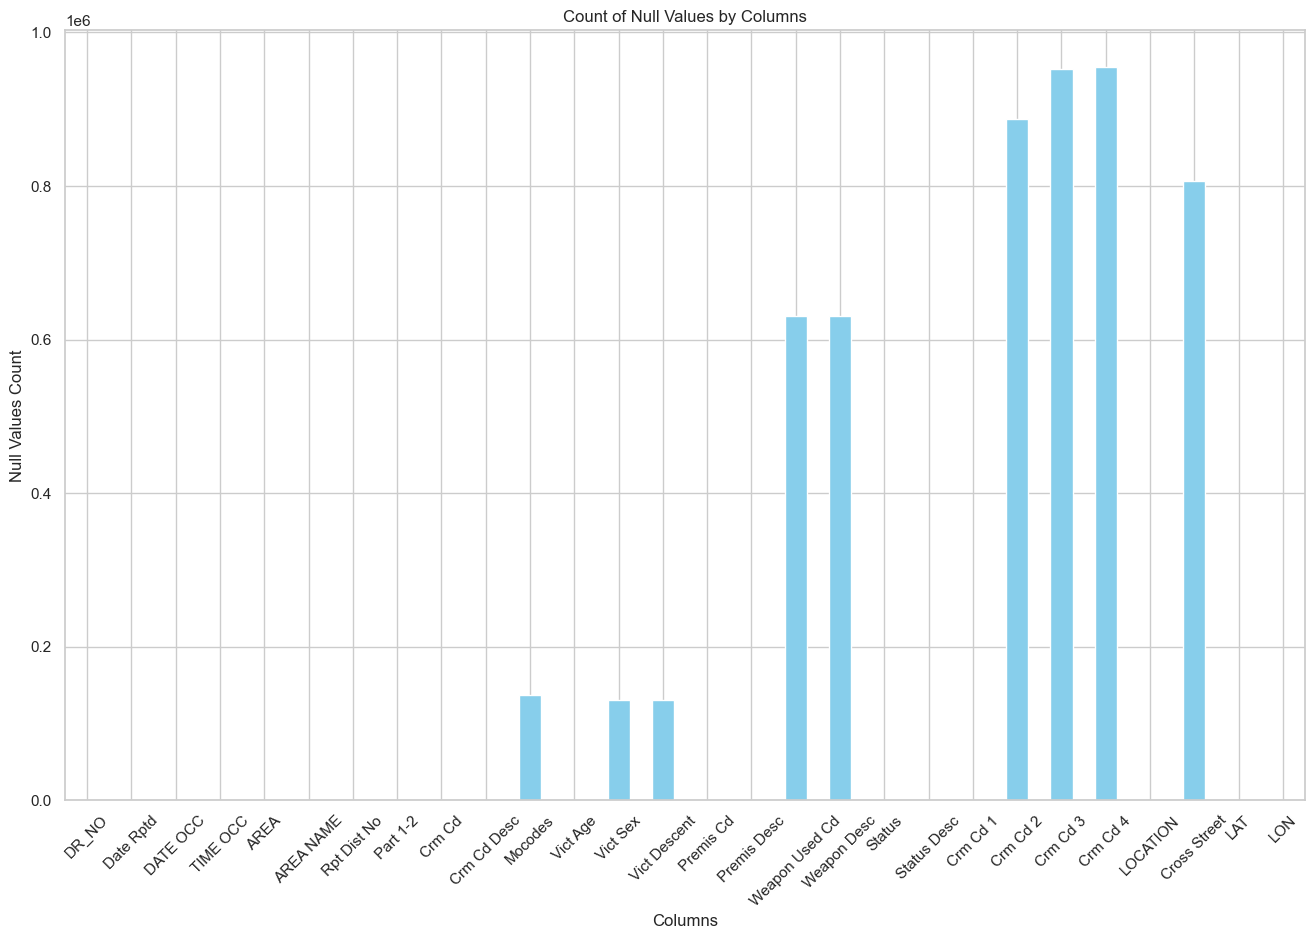

In [256]:
#Counts null values for each column
null_counts_recent = df_recent.isnull().sum()

#Creates bar graph of null values
plt.figure(figsize=(16,10))
null_counts_recent.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values by Columns')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45)
plt.show()

In [257]:
#Creates function to iterate over records, printing unique records
def print_unique_values(df, column_name):
    unique_values = df[column_name].drop_duplicates().tolist()
    
    print(f"Unique {column_name} Values:")
    for value in unique_values:
        print(value)

In [258]:
#Calls print unique values function
print_unique_values(df_recent, 'LOCATION')

Unique LOCATION Values:
1900 S  LONGWOOD                     AV
1000 S  FLOWER                       ST
1400 W  37TH                         ST
14000    RIVERSIDE                    DR
1900    TRANSIENT
9900    COMPTON                      AV
1100 S  GRAND                        AV
2500 S  SYCAMORE                     AV
1300 E  57TH                         ST
9000    CEDROS                       AV
100 W  COLDEN                       AV
13400    RANGOON                      ST
900 N  MARIPOSA                     AV
VALJEAN                      ST
900 S  LAKE                         ST
4200    SANTO TOMAS                  DR
400 W  90TH                         ST
4000    WALL                         ST
4500    LOMITA                       ST
5200    GENESTA                      AV
800 S  TREMAINE                     AV
16700    MONTE HERMOSO                DR
8500    COLUMBUS                     AV
1700 S  WESTMORELAND                 AV
200 E  AVENUE 28
21000    VANOWEN               

In [259]:
#Calls print unique values function
print_unique_values(df_recent, 'AREA NAME')

Unique AREA NAME Values:
Wilshire
Central
Southwest
Van Nuys
Hollywood
Southeast
Newton
Mission
Rampart
West Valley
West LA
Olympic
Hollenbeck
Topanga
Northeast
77th Street
Pacific
N Hollywood
Harbor
Foothill
Devonshire


In [260]:
#Calls print unique reporting district numbers function
print_unique_values(df_recent, 'Rpt Dist No')

Unique Rpt Dist No Values:
784
182
356
964
666
1826
303
1375
1974
1822
1988
201
1029
271
391
1802
1354
776
1067
747
801
1983
2088
413
2157
1132
2113
1243
842
1242
1268
1101
1446
233
1259
1801
1539
478
1985
1045
249
1535
1333
971
1902
645
317
1256
1555
585
257
1612
1517
622
1123
1745
774
467
162
637
158
829
1764
1113
1775
1913
1841
1767
1015
1921
1463
1263
1557
1445
1525
1846
1241
311
1444
1585
238
357
1849
1215
929
1041
2198
396
1954
1504
783
1144
291
1179
722
1548
911
1207
231
1152
2071
1324
1406
1718
1981
269
668
1383
1541
132
1267
1362
504
1352
1025
1668
1361
989
1393
2026
1977
163
1331
1995
1602
185
656
235
1063
2146
2069
256
1832
702
237
1017
1001
1464
488
1213
551
828
1964
939
1273
714
1023
1251
1824
526
1024
395
636
1269
1413
142
701
725
974
1795
459
1204
643
1172
1293
923
2034
2014
2054
1265
773
1364
1161
439
1124
1698
1712
1353
1303
565
1321
507
1405
1532
646
563
279
1322
497
1325
1494
429
1799
2079
759
1677
1252
1391
528
736
1721
363
1122
1255
1249
752
1569
2074
2175
307
215


In [261]:
#Determines datatypes and total entries.
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122901 entries, 0 to 2122900
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

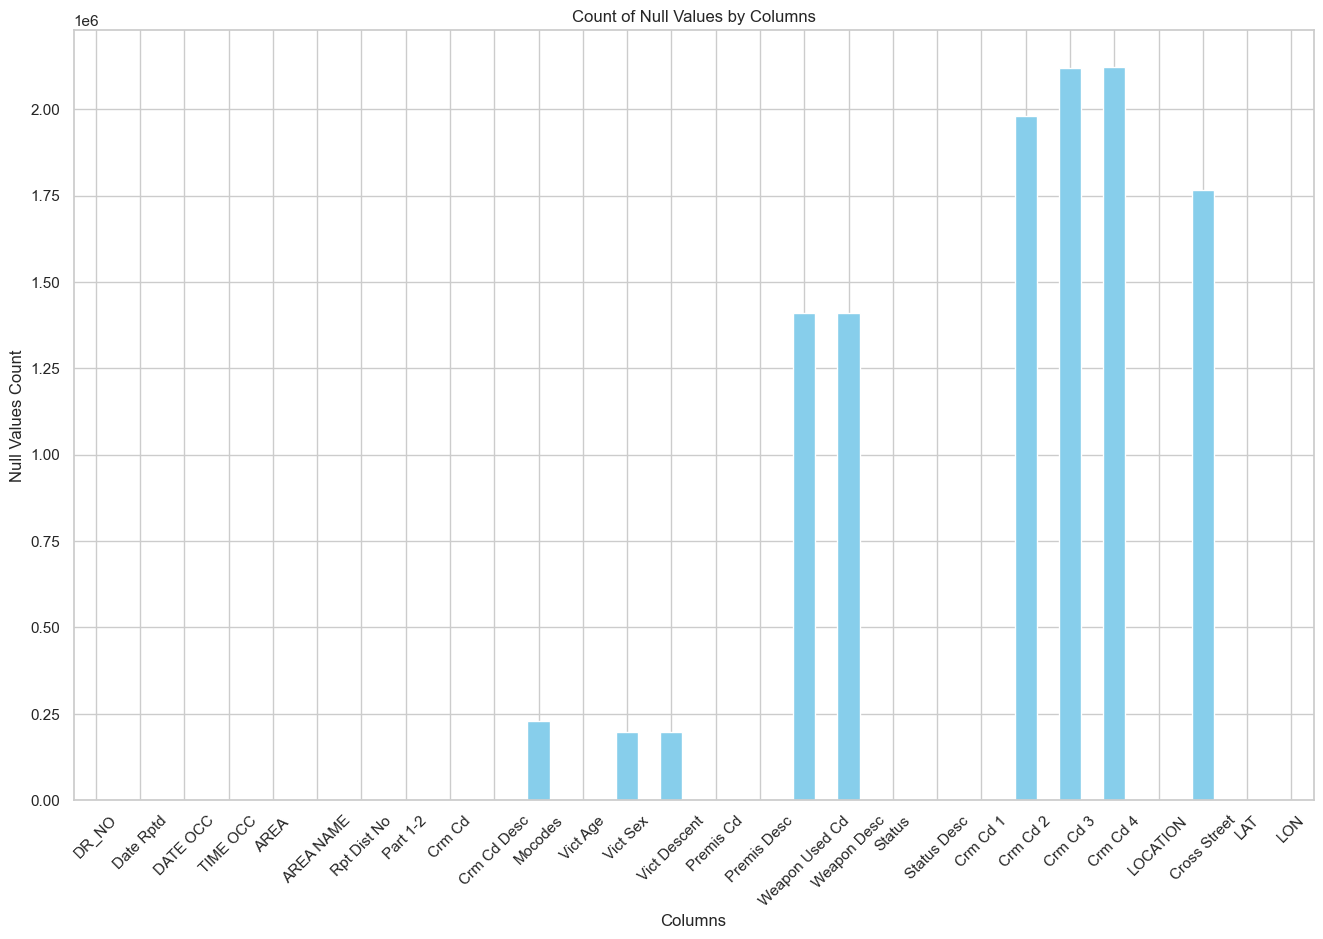

In [262]:
#Counts null values for each column
null_counts_historical = df_historical.isnull().sum()

#Creates bar graph of null values
plt.figure(figsize=(16,10))
null_counts_historical.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values by Columns')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45)
plt.show()

In [280]:
#Calls print unique values function
print_unique_values(df_historical, 'AREA NAME')

Unique AREA NAME Values:
Newton
Pacific
Hollywood
Central
Northeast
Hollenbeck
Southwest
Rampart
Southeast
Olympic
Harbor
Wilshire
77th Street
West LA
Van Nuys
West Valley
N Hollywood
Mission
Topanga
Foothill
Devonshire


In [281]:
#Calls print unique reporting district numbers function
print_unique_values(df_historical, 'Rpt Dist No')

Unique Rpt Dist No Values:
1385
1485
1324
646
176
162
182
157
171
132
118
158
152
127
185
192
166
119
139
153
145
181
147
174
123
138
164
111
133
148
143
142
105
165
151
156
159
1307
1171
163
195
101
135
161
155
154
124
134
453
129
144
122
141
121
191
146
1303
112
100
128
131
395
109
269
281
202
248
1863
221
204
219
235
375
279
238
459
423
256
399
201
2019
237
247
246
501
257
516
503
211
216
218
285
245
231
236
233
289
266
203
265
299
217
249
295
271
291
215
241
362
205
251
261
275
212
239
506
244
514
396
200
427
504
445
2056
267
242
702
377
1183
569
1265
551
497
415
264
456
282
519
338
517
584
666
507
522
292
557
361
529
637
471
443
677
222
561
558
2064
243
254
412
2033
678
564
509
642
566
719
563
783
778
701
2015
513
223
336
562
632
393
376
328
1477
392
314
337
312
357
354
356
334
373
327
353
332
374
335
359
394
398
331
397
308
326
358
355
391
363
379
333
311
301
307
321
351
767
303
315
325
319
318
763
729
316
341
378
343
305
317
515
329
313
777
727
775
518
488
789
749
764
309
525
58

In [282]:
#Determines datatypes, total entries, and non-null count.
df_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294620 entries, 0 to 294619
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Report ID                294620 non-null  int64  
 1   Report Type              294620 non-null  object 
 2   Arrest Date              294620 non-null  object 
 3   Time                     294603 non-null  float64
 4   Area ID                  294620 non-null  int64  
 5   Area Name                294620 non-null  object 
 6   Reporting District       294620 non-null  int64  
 7   Age                      294620 non-null  int64  
 8   Sex Code                 294620 non-null  object 
 9   Descent Code             294620 non-null  object 
 10  Arrest Type Code         294619 non-null  object 
 11  Charge                   294620 non-null  object 
 12  Disposition Description  270171 non-null  object 
 13  Address                  294620 non-null  object 
 14  LAT 

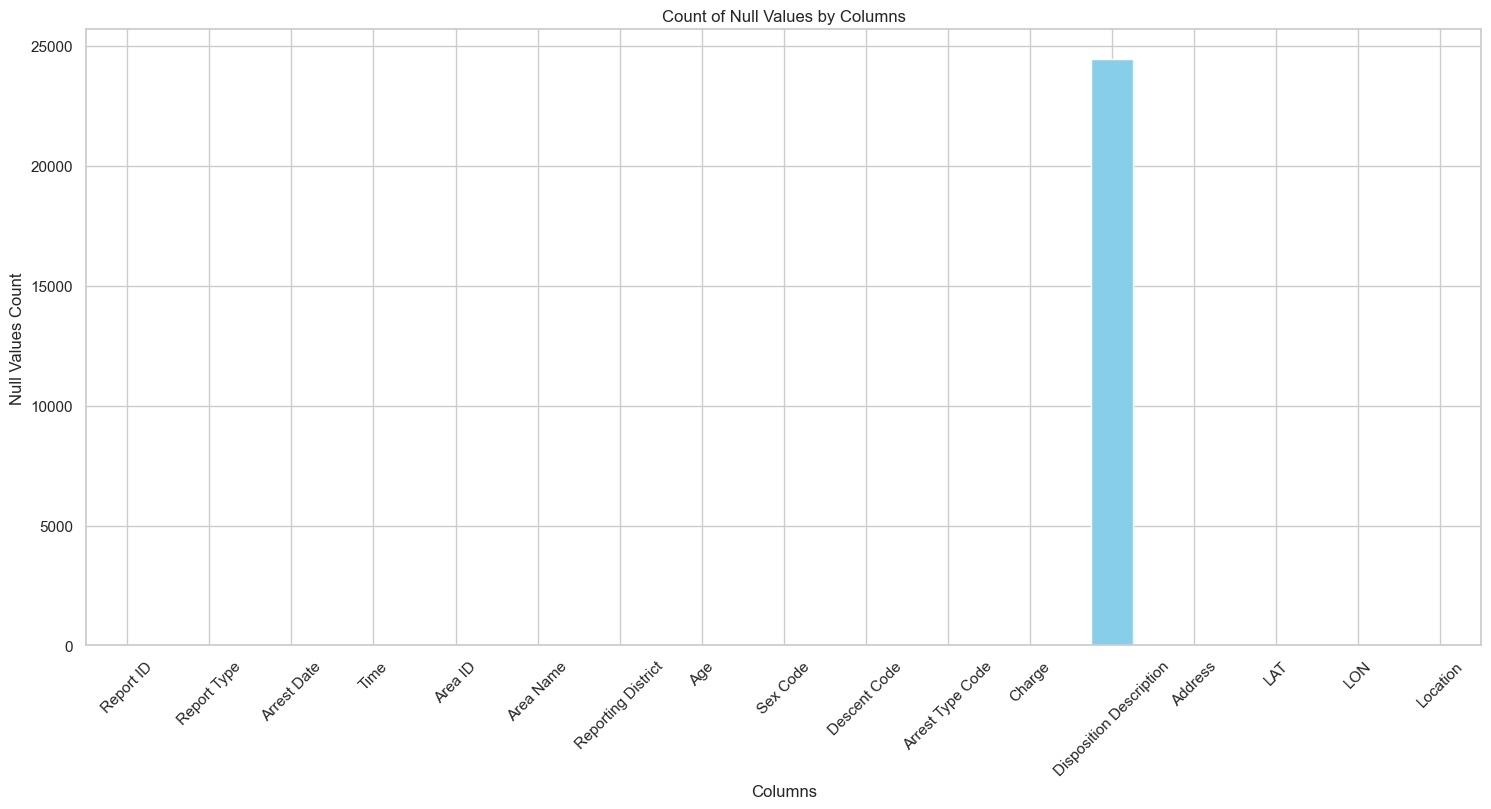

In [283]:
#Counts null values for each column
null_counts_arrests = df_arrests.isnull().sum()

#Creates bar graph of null values
plt.figure(figsize=(18,8))
null_counts_arrests.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values by Columns')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45)
plt.show()

In [284]:
#Calls print unique values function
print_unique_values(df_arrests, 'Area Name')

Unique Area Name Values:
Pacific
Devonshire
Hollywood
Central
Rampart
N Hollywood
West LA
Mission
Van Nuys
Southeast
Wilshire
Topanga
Southwest
77th Street
Hollenbeck
Northeast
Olympic
West Valley
Newton
Foothill
Harbor


In [285]:
#Calls print unique values function
print_unique_values(df_arrests, 'Reporting District')

Unique Reporting District Values:
1412
1738
677
148
266
1548
899
246
886
1987
1747
245
201
939
247
1761
883
1838
724
1516
195
923
2143
396
159
836
1208
457
1414
1467
1109
853
1862
2011
111
1162
2157
1961
1502
811
471
904
855
236
453
123
1139
237
439
192
849
1063
1323
1909
2156
1333
313
1331
1787
1762
1794
1803
1431
2189
257
1075
645
1411
1727
1024
1213
637
1684
311
2146
1169
636
1494
427
935
769
2139
2196
1921
2128
265
466
2033
759
1526
1985
1792
1438
1258
1515
1136
1008
839
1353
1149
1235
1681
889
2137
1249
2079
1842
152
519
1133
392
1367
334
373
1832
1371
363
789
1981
1307
1267
2115
1372
362
1159
1913
765
2105
1041
1785
891
2021
1521
182
1483
1321
2029
2097
1707
906
915
1799
1124
2056
205
564
1352
1823
1313
1549
647
1569
391
702
379
529
142
1971
1718
1641
1633
119
395
1841
1463
859
462
783
666
516
1547
153
1021
112
1263
2134
522
343
338
1539
1514
2093
353
127
656
1506
1964
269
1446
914
1012
1347
1009
642
1268
1822
1383
648
1126
1245
162
1361
248
1005
1242
563
1407
1023
316
448
299
16

## Cleaning<a id="cleaning"></a>

>In the subsequent steps, I will remove several columns from both the recent, historical, and arrests dataframes. The removed columns contain data that is not pertinent to the analysis, non-essential contextual information, missing records, or duplicate information.

>Next, I will standardize column titles for clarity and simplicity in analysis by converting them to lowercase and removing spaces. I will also standardize column names across datasets to ensure consistency for later transformations.

In [286]:
#Creates function to strip trailing and leading white spaces from column names, then removes columns from dataframe
def remove_columns (df, columns_to_remove):
    df.columns = df.columns.str.strip()
    
    df.drop(columns=columns_to_remove, errors='ignore', inplace=True)
    
    return df

In [287]:
#Columns to remove
columns_to_remove = ['Part 1-2', 'Crm Cd Desc', 'Mocodes', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']

#Calls the function to remove columns
df_recent = remove_columns(df_recent, columns_to_remove)

In [288]:
df_recent.head()

dr_no               date rptd                date occ  time occ  area  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   area name  rpt dist no  crm cd  vict age vict sex vict descent  premis cd  \
0   Wilshire          784     510         0        M            O      101.0   
1    Central          182     330        47        M            O      128.0   
2  Southwest          356     480        19        X            X      502.0   
3   Van Nuys          964     343        19        M            O      405.0   
4  Hollywood          666     354        28        M            H      102.0   

   weapon used cd status                                  location      lat  \
0             NaN     AA   1900 S  LONGWOOD                     AV  34.0375   
1             NaN     IC   1000 S  FLOWER                       ST  34.0444   
2             NaN     IC   1400 W  37TH                         ST  34.0210   
3             NaN     IC  14000    RIVERSIDE                    DR  34.1576   
4             NaN     IC                         1900    TRANSIENT  34.0944   

        lon  
0 -118.3506  
1 -118.2628  
2 -118.3002  
3 -118.4387  
4 -118.3277

In [289]:
#Calls the function to remove columns
df_historical = remove_columns(df_historical, columns_to_remove)

In [290]:
df_historical.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350    13   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45    14   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515    13   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150     6   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100     1   

   AREA NAME  Rpt Dist No  Crm Cd  Vict Age Vict Sex Vict Descent  Premis Cd  \
0     Newton         1385     900        48        M            H      501.0   
1    Pacific         1485     740         0        M            W      101.0   
2     Newton         1324     946         0        M            H      103.0   
3  Hollywood          646     900        47        F            W      101.0   
4    Central          176     122        47        F            H      103.0   

   Weapon Used Cd Status                                 LOCATION      LAT  \
0             NaN     AA   300 E  GAGE                         AV  33.9825   
1             NaN     IC          SEPULVEDA                    BL  33.9599   
2             NaN     IC  1300 E  21ST                         ST  34.0224   
3           102.0     IC          CAHUENGA                     BL  34.1016   
4           400.0     IC          8TH                          ST  34.0387   

        LON  
0 -118.2695  
1 -118.3962  
2 -118.2524  
3 -118.3295  
4 -118.2488

In [291]:
#Columns to remove
columns_to_remove = ['Charge Group Code', 'Charge Group Description', 'Charge Description', 'Cross Street', 'Booking Date', 'Booking Time', 'Booking Location', 'Booking Location Code']

#Calls the function to remove columns
df_arrests = remove_columns(df_arrests, columns_to_remove)

In [292]:
df_arrests.head()

Report ID Report Type             Arrest Date    Time  Area ID   Area Name  \
0  231413977         RFC  07/13/2023 12:00:00 AM  2330.0       14     Pacific   
1  231715213         RFC  09/01/2023 12:00:00 AM  2300.0       17  Devonshire   
2  230612568         RFC  07/14/2023 12:00:00 AM  2150.0        6   Hollywood   
3  230119897         RFC  09/13/2023 12:00:00 AM  1332.0        1     Central   
4  230214008         RFC  07/04/2023 12:00:00 AM  1445.0        2     Rampart   

   Reporting District  Age Sex Code Descent Code Arrest Type Code  \
0                1412   29        M            H                I   
1                1738   17        F            H                M   
2                 677   30        M            O                M   
3                 148   50        M            A                M   
4                 266   38        M            H                I   

        Charge      Disposition Description  \
0     25620(A)  MISDEMEANOR COMPLAINT FILED   
1  45.03(A)LAM           COUNSELED/RELEASED   
2     647(B)PC  MISDEMEANOR COMPLAINT FILED   
3  41.18A1LAMC  MISDEMEANOR COMPLAINT FILED   
4  41.27(C)LAM  MISDEMEANOR COMPLAINT FILED   

                                    Address      LAT       LON  \
0           BROOKS                       AV  33.9908 -118.4765   
1  15800    TULSA                        ST  34.2682 -118.4760   
2                                   WESTERN  34.0845 -118.3091   
3                                       5TH  34.0421 -118.2405   
4                               BONNIE BRAE  34.0539 -118.2756   

                    Location  
0  POINT (-118.4765 33.9908)  
1   POINT (-118.476 34.2682)  
2  POINT (-118.3091 34.0845)  
3  POINT (-118.2405 34.0421)  
4  POINT (-118.2756 34.0539)

>Altering columns to lowercase letters for easy coding and uniformity between datasets.

In [293]:
#Creates an interative loop function to lowercase column names
def lowercase_columns (df):
    df.columns = [col.lower() for col in df.columns]
    return df

In [294]:
#Calls lowercase columns function
lowercase_columns(df_recent)

In [295]:
#Calls lowercase columns function
lowercase_columns(df_historical)

In [296]:
#Calls lowercase columns function
lowercase_columns(df_arrests)

In [297]:
df_arrests.head()

report id report type             arrest date    time  area id   area name  \
0  231413977         RFC  07/13/2023 12:00:00 AM  2330.0       14     Pacific   
1  231715213         RFC  09/01/2023 12:00:00 AM  2300.0       17  Devonshire   
2  230612568         RFC  07/14/2023 12:00:00 AM  2150.0        6   Hollywood   
3  230119897         RFC  09/13/2023 12:00:00 AM  1332.0        1     Central   
4  230214008         RFC  07/04/2023 12:00:00 AM  1445.0        2     Rampart   

   reporting district  age sex code descent code arrest type code  \
0                1412   29        M            H                I   
1                1738   17        F            H                M   
2                 677   30        M            O                M   
3                 148   50        M            A                M   
4                 266   38        M            H                I   

        charge      disposition description  \
0     25620(A)  MISDEMEANOR COMPLAINT FILED   
1  45.03(A)LAM           COUNSELED/RELEASED   
2     647(B)PC  MISDEMEANOR COMPLAINT FILED   
3  41.18A1LAMC  MISDEMEANOR COMPLAINT FILED   
4  41.27(C)LAM  MISDEMEANOR COMPLAINT FILED   

                                    address      lat       lon  \
0           BROOKS                       AV  33.9908 -118.4765   
1  15800    TULSA                        ST  34.2682 -118.4760   
2                                   WESTERN  34.0845 -118.3091   
3                                       5TH  34.0421 -118.2405   
4                               BONNIE BRAE  34.0539 -118.2756   

                    location  
0  POINT (-118.4765 33.9908)  
1   POINT (-118.476 34.2682)  
2  POINT (-118.3091 34.0845)  
3  POINT (-118.2405 34.0421)  
4  POINT (-118.2756 34.0539)

>Replacing spaces with underscores for uniformity between datasets and good coding practice.

In [298]:
#Creates a function to replace spaces with _ in column titles
def remove_spaces_columns (df):
    df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
    return df

In [299]:
#Calls remove spaces columns function
remove_spaces_columns(df_recent)

In [300]:
#Calls remove spaces columns function
remove_spaces_columns(df_historical)

In [301]:
#Calls remove spaces columns function
remove_spaces_columns(df_arrests)

>Creating uniformity of column names between datasets for easy transformation in next steps and clarity in column names.

In [302]:
#Creates a function to rename column names
def rename_columns (df, rename_dict):
    df.rename(columns=rename_dict, inplace=True)
    return df

In [303]:
#Creates a dictionary with the old columns to be renamed as new columns
rename_dict = {
    'dr_no': 'report_id',
    'date_rptd': 'date_reported',
    'date_occ': 'date_occurred',
    'time_occ': 'time',
    'rpt_dist_no': 'reporting_district',
    'crm_cd': 'crime_code',
    'vict_age': 'age',
    'vict_sex': 'sex',
    'vict_descent': 'race',
    'premis_cd': 'premise_code',
    'weapon_used_cd': 'weapon_code',
    'lat': 'latitude',
    'lon': 'longitude',
    'location': 'address'
}

#Calls rename_columns function
df_recent = rename_columns(df_recent, rename_dict)

df_recent.head()

report_id           date_reported           date_occurred  time  area  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM  2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM  1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM  1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM  2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM  1200     6   

   area_name  reporting_district  crime_code  age sex race  premise_code  \
0   Wilshire                 784         510    0   M    O         101.0   
1    Central                 182         330   47   M    O         128.0   
2  Southwest                 356         480   19   X    X         502.0   
3   Van Nuys                 964         343   19   M    O         405.0   
4  Hollywood                 666         354   28   M    H         102.0   

   weapon_code status                                   address  latitude  \
0          NaN     AA   1900 S  LONGWOOD                     AV   34.0375   
1          NaN     IC   1000 S  FLOWER                       ST   34.0444   
2          NaN     IC   1400 W  37TH                         ST   34.0210   
3          NaN     IC  14000    RIVERSIDE                    DR   34.1576   
4          NaN     IC                         1900    TRANSIENT   34.0944   

   longitude  
0  -118.3506  
1  -118.2628  
2  -118.3002  
3  -118.4387  
4  -118.3277

In [304]:
#Calls rename_columns function
df_historical = rename_columns(df_historical, rename_dict)

df_historical.head()

report_id           date_reported           date_occurred  time  area  \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM  1350    13   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM    45    14   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM  1515    13   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM   150     6   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM  2100     1   

   area_name  reporting_district  crime_code  age sex race  premise_code  \
0     Newton                1385         900   48   M    H         501.0   
1    Pacific                1485         740    0   M    W         101.0   
2     Newton                1324         946    0   M    H         103.0   
3  Hollywood                 646         900   47   F    W         101.0   
4    Central                 176         122   47   F    H         103.0   

   weapon_code status                                  address  latitude  \
0          NaN     AA   300 E  GAGE                         AV   33.9825   
1          NaN     IC          SEPULVEDA                    BL   33.9599   
2          NaN     IC  1300 E  21ST                         ST   34.0224   
3        102.0     IC          CAHUENGA                     BL   34.1016   
4        400.0     IC          8TH                          ST   34.0387   

   longitude  
0  -118.2695  
1  -118.3962  
2  -118.2524  
3  -118.3295  
4  -118.2488

In [305]:
#Creates dictionary of old columns renamed to new columns
rename_dict = {
    'arrest_date': 'date_reported',
    'area_id': 'area',
    'descent_code': 'race',
    'arrest_type_code': 'arrest_code',
    'lat': 'latitude',
    'lon': 'longitude',
    'sex_code': 'sex'
}

#Calls rename_columns function
df_arrests = rename_columns(df_arrests, rename_dict)

df_arrests.head()

report_id report_type           date_reported    time  area   area_name  \
0  231413977         RFC  07/13/2023 12:00:00 AM  2330.0    14     Pacific   
1  231715213         RFC  09/01/2023 12:00:00 AM  2300.0    17  Devonshire   
2  230612568         RFC  07/14/2023 12:00:00 AM  2150.0     6   Hollywood   
3  230119897         RFC  09/13/2023 12:00:00 AM  1332.0     1     Central   
4  230214008         RFC  07/04/2023 12:00:00 AM  1445.0     2     Rampart   

   reporting_district  age sex race arrest_code       charge  \
0                1412   29   M    H           I     25620(A)   
1                1738   17   F    H           M  45.03(A)LAM   
2                 677   30   M    O           M     647(B)PC   
3                 148   50   M    A           M  41.18A1LAMC   
4                 266   38   M    H           I  41.27(C)LAM   

       disposition_description                                   address  \
0  MISDEMEANOR COMPLAINT FILED           BROOKS                       AV   
1           COUNSELED/RELEASED  15800    TULSA                        ST   
2  MISDEMEANOR COMPLAINT FILED                                   WESTERN   
3  MISDEMEANOR COMPLAINT FILED                                       5TH   
4  MISDEMEANOR COMPLAINT FILED                               BONNIE BRAE   

   latitude  longitude                   location  
0   33.9908  -118.4765  POINT (-118.4765 33.9908)  
1   34.2682  -118.4760   POINT (-118.476 34.2682)  
2   34.0845  -118.3091  POINT (-118.3091 34.0845)  
3   34.0421  -118.2405  POINT (-118.2405 34.0421)  
4   34.0539  -118.2756  POINT (-118.2756 34.0539)

>Converting the date_recorded, date_occurred, and time columns to datetime format and restricting it to display only the month, day, and year or hour and minutes.

In [306]:
#Creates a function to convert a column to datetime.time and restrict the date to month, day, year.
def datetime_conversion (df, column_name):
    datetime_format = '%m/%d/%Y %I:%M:%S %p'
    
    df[column_name] = pd.to_datetime(df[column_name], format=datetime_format, errors='coerce').dt.strftime('%m/%d/%Y')
    return df

In [307]:
#Calls datetime conversion function
df_recent = datetime_conversion(df_recent, 'date_reported')

In [308]:
#Calls datetime conversion function
df_recent = datetime_conversion(df_recent, 'date_occurred')

In [309]:
#Calls datetime conversion function
df_historical = datetime_conversion(df_historical, 'date_reported')

In [310]:
#Calls datetime conversion function
df_historical = datetime_conversion(df_historical, 'date_occurred')

In [311]:
#Calls datetime conversion function
df_arrests = datetime_conversion(df_arrests, 'date_reported')

In [312]:
#Creates function to convert time column to datetime, restricting to hours and minutes
def time_conversion (df, column_name):
    df[column_name] = pd.to_datetime(df[column_name].astype(str), format='%H%M', errors='coerce').dt.time
    return df

In [313]:
#Calls time_conversion function
df_recent = time_conversion(df_recent, 'time')

df_recent.head()

report_id date_reported date_occurred      time  area  area_name  \
0  190326475    03/01/2020    03/01/2020  21:30:00     7   Wilshire   
1  200106753    02/09/2020    02/08/2020  18:00:00     1    Central   
2  200320258    11/11/2020    11/04/2020  17:00:00     3  Southwest   
3  200907217    05/10/2023    03/10/2020  20:37:00     9   Van Nuys   
4  220614831    08/18/2022    08/17/2020  12:00:00     6  Hollywood   

   reporting_district  crime_code  age sex race  premise_code  weapon_code  \
0                 784         510    0   M    O         101.0          NaN   
1                 182         330   47   M    O         128.0          NaN   
2                 356         480   19   X    X         502.0          NaN   
3                 964         343   19   M    O         405.0          NaN   
4                 666         354   28   M    H         102.0          NaN   

  status                                   address  latitude  longitude  
0     AA   1900 S  LONGWOOD                     AV   34.0375  -118.3506  
1     IC   1000 S  FLOWER                       ST   34.0444  -118.2628  
2     IC   1400 W  37TH                         ST   34.0210  -118.3002  
3     IC  14000    RIVERSIDE                    DR   34.1576  -118.4387  
4     IC                         1900    TRANSIENT   34.0944  -118.3277

In [314]:
#Calls time_conversion function
df_historical = time_conversion(df_historical, 'time')

df_historical.head()

report_id date_reported date_occurred      time  area  area_name  \
0    1307355    02/20/2010    02/20/2010  13:50:00    13     Newton   
1   11401303    09/13/2010    09/12/2010  04:05:00    14    Pacific   
2   70309629    08/09/2010    08/09/2010  15:15:00    13     Newton   
3   90631215    01/05/2010    01/05/2010  15:00:00     6  Hollywood   
4  100100501    01/03/2010    01/02/2010  21:00:00     1    Central   

   reporting_district  crime_code  age sex race  premise_code  weapon_code  \
0                1385         900   48   M    H         501.0          NaN   
1                1485         740    0   M    W         101.0          NaN   
2                1324         946    0   M    H         103.0          NaN   
3                 646         900   47   F    W         101.0        102.0   
4                 176         122   47   F    H         103.0        400.0   

  status                                  address  latitude  longitude  
0     AA   300 E  GAGE                         AV   33.9825  -118.2695  
1     IC          SEPULVEDA                    BL   33.9599  -118.3962  
2     IC  1300 E  21ST                         ST   34.0224  -118.2524  
3     IC          CAHUENGA                     BL   34.1016  -118.3295  
4     IC          8TH                          ST   34.0387  -118.2488

In [315]:
#Converts time column from float to string
df_arrests['time'] = df_arrests['time'].fillna(0).astype(int).astype(str).str.zfill(4)

#Converts string column to datetime.time datatype and formats timestamp
df_arrests['time'] = pd.to_datetime(df_arrests['time'], format='%H%M', errors='coerce').dt.time
df_arrests.head()

report_id report_type date_reported      time  area   area_name  \
0  231413977         RFC    07/13/2023  23:30:00    14     Pacific   
1  231715213         RFC    09/01/2023  23:00:00    17  Devonshire   
2  230612568         RFC    07/14/2023  21:50:00     6   Hollywood   
3  230119897         RFC    09/13/2023  13:32:00     1     Central   
4  230214008         RFC    07/04/2023  14:45:00     2     Rampart   

   reporting_district  age sex race arrest_code       charge  \
0                1412   29   M    H           I     25620(A)   
1                1738   17   F    H           M  45.03(A)LAM   
2                 677   30   M    O           M     647(B)PC   
3                 148   50   M    A           M  41.18A1LAMC   
4                 266   38   M    H           I  41.27(C)LAM   

       disposition_description                                   address  \
0  MISDEMEANOR COMPLAINT FILED           BROOKS                       AV   
1           COUNSELED/RELEASED  15800    TULSA                        ST   
2  MISDEMEANOR COMPLAINT FILED                                   WESTERN   
3  MISDEMEANOR COMPLAINT FILED                                       5TH   
4  MISDEMEANOR COMPLAINT FILED                               BONNIE BRAE   

   latitude  longitude                   location  
0   33.9908  -118.4765  POINT (-118.4765 33.9908)  
1   34.2682  -118.4760   POINT (-118.476 34.2682)  
2   34.0845  -118.3091  POINT (-118.3091 34.0845)  
3   34.0421  -118.2405  POINT (-118.2405 34.0421)  
4   34.0539  -118.2756  POINT (-118.2756 34.0539)

>Note that the columns have been converted to datetime.time datatype which will be listed as "object" type in df.info()

>Converting float datatype columns to integer datatype columns.

In [316]:
#Converts float datatype columns to integer datatypes, ignoring null values
def convert_float_datatype (df, column_name):
    df[column_name] = df[column_name].replace([np.nan, np.inf, -np.inf], 0)
    df[column_name] = df[column_name].astype(int)
    return df

In [317]:
#Calls convert_float_datatype
df_recent = convert_float_datatype(df_recent, 'premise_code')

In [318]:
#Calls convert_float_datatype
df_recent = convert_float_datatype(df_recent, 'weapon_code')

df_recent.head()

report_id date_reported date_occurred      time  area  area_name  \
0  190326475    03/01/2020    03/01/2020  21:30:00     7   Wilshire   
1  200106753    02/09/2020    02/08/2020  18:00:00     1    Central   
2  200320258    11/11/2020    11/04/2020  17:00:00     3  Southwest   
3  200907217    05/10/2023    03/10/2020  20:37:00     9   Van Nuys   
4  220614831    08/18/2022    08/17/2020  12:00:00     6  Hollywood   

   reporting_district  crime_code  age sex race  premise_code  weapon_code  \
0                 784         510    0   M    O           101            0   
1                 182         330   47   M    O           128            0   
2                 356         480   19   X    X           502            0   
3                 964         343   19   M    O           405            0   
4                 666         354   28   M    H           102            0   

  status                                   address  latitude  longitude  
0     AA   1900 S  LONGWOOD                     AV   34.0375  -118.3506  
1     IC   1000 S  FLOWER                       ST   34.0444  -118.2628  
2     IC   1400 W  37TH                         ST   34.0210  -118.3002  
3     IC  14000    RIVERSIDE                    DR   34.1576  -118.4387  
4     IC                         1900    TRANSIENT   34.0944  -118.3277

In [319]:
#Calls convert_float_datatype
df_historical = convert_float_datatype(df_historical, 'premise_code')

In [320]:
#Calls convert_float_datatype
df_historical = convert_float_datatype(df_historical, 'weapon_code')

df_historical.head()

report_id date_reported date_occurred      time  area  area_name  \
0    1307355    02/20/2010    02/20/2010  13:50:00    13     Newton   
1   11401303    09/13/2010    09/12/2010  04:05:00    14    Pacific   
2   70309629    08/09/2010    08/09/2010  15:15:00    13     Newton   
3   90631215    01/05/2010    01/05/2010  15:00:00     6  Hollywood   
4  100100501    01/03/2010    01/02/2010  21:00:00     1    Central   

   reporting_district  crime_code  age sex race  premise_code  weapon_code  \
0                1385         900   48   M    H           501            0   
1                1485         740    0   M    W           101            0   
2                1324         946    0   M    H           103            0   
3                 646         900   47   F    W           101          102   
4                 176         122   47   F    H           103          400   

  status                                  address  latitude  longitude  
0     AA   300 E  GAGE                         AV   33.9825  -118.2695  
1     IC          SEPULVEDA                    BL   33.9599  -118.3962  
2     IC  1300 E  21ST                         ST   34.0224  -118.2524  
3     IC          CAHUENGA                     BL   34.1016  -118.3295  
4     IC          8TH                          ST   34.0387  -118.2488

In [321]:
df_arrests.head()

report_id report_type date_reported      time  area   area_name  \
0  231413977         RFC    07/13/2023  23:30:00    14     Pacific   
1  231715213         RFC    09/01/2023  23:00:00    17  Devonshire   
2  230612568         RFC    07/14/2023  21:50:00     6   Hollywood   
3  230119897         RFC    09/13/2023  13:32:00     1     Central   
4  230214008         RFC    07/04/2023  14:45:00     2     Rampart   

   reporting_district  age sex race arrest_code       charge  \
0                1412   29   M    H           I     25620(A)   
1                1738   17   F    H           M  45.03(A)LAM   
2                 677   30   M    O           M     647(B)PC   
3                 148   50   M    A           M  41.18A1LAMC   
4                 266   38   M    H           I  41.27(C)LAM   

       disposition_description                                   address  \
0  MISDEMEANOR COMPLAINT FILED           BROOKS                       AV   
1           COUNSELED/RELEASED  15800    TULSA                        ST   
2  MISDEMEANOR COMPLAINT FILED                                   WESTERN   
3  MISDEMEANOR COMPLAINT FILED                                       5TH   
4  MISDEMEANOR COMPLAINT FILED                               BONNIE BRAE   

   latitude  longitude                   location  
0   33.9908  -118.4765  POINT (-118.4765 33.9908)  
1   34.2682  -118.4760   POINT (-118.476 34.2682)  
2   34.0845  -118.3091  POINT (-118.3091 34.0845)  
3   34.0421  -118.2405  POINT (-118.2405 34.0421)  
4   34.0539  -118.2756  POINT (-118.2756 34.0539)

## Transformation<a id="transformation"></a>

>The subsequent steps involve concatenating the df_recent and df_historical dataframes into a single dataframe. This combined dataframe will then be merged with the df_arrests dataframe using an outer join. The dataframe will be reorganized to prioritize key columns for analysis, with report_id designated as the primary key column. The dataframe will be assessed for data completeness by evaluating the total of null values for key variables. Finally, the dataframe will be copied, the copy will be used for analysis.

In [322]:
#Combines two dataframes with identical column names
df_combined = pd.concat([df_recent, df_historical], ignore_index=True)

df_combined.head()

report_id date_reported date_occurred      time  area  area_name  \
0  190326475    03/01/2020    03/01/2020  21:30:00     7   Wilshire   
1  200106753    02/09/2020    02/08/2020  18:00:00     1    Central   
2  200320258    11/11/2020    11/04/2020  17:00:00     3  Southwest   
3  200907217    05/10/2023    03/10/2020  20:37:00     9   Van Nuys   
4  220614831    08/18/2022    08/17/2020  12:00:00     6  Hollywood   

   reporting_district  crime_code  age sex race  premise_code  weapon_code  \
0                 784         510    0   M    O           101            0   
1                 182         330   47   M    O           128            0   
2                 356         480   19   X    X           502            0   
3                 964         343   19   M    O           405            0   
4                 666         354   28   M    H           102            0   

  status                                   address  latitude  longitude  
0     AA   1900 S  LONGWOOD                     AV   34.0375  -118.3506  
1     IC   1000 S  FLOWER                       ST   34.0444  -118.2628  
2     IC   1400 W  37TH                         ST   34.0210  -118.3002  
3     IC  14000    RIVERSIDE                    DR   34.1576  -118.4387  
4     IC                         1900    TRANSIENT   34.0944  -118.3277

In [323]:
df_final = pd.merge(df_combined, df_arrests, left_index=True, right_index=True)

In [324]:
df_final.head()

report_id_x date_reported_x date_occurred    time_x  area_x area_name_x  \
0    190326475      03/01/2020    03/01/2020  21:30:00       7    Wilshire   
1    200106753      02/09/2020    02/08/2020  18:00:00       1     Central   
2    200320258      11/11/2020    11/04/2020  17:00:00       3   Southwest   
3    200907217      05/10/2023    03/10/2020  20:37:00       9    Van Nuys   
4    220614831      08/18/2022    08/17/2020  12:00:00       6   Hollywood   

   reporting_district_x  crime_code  age_x sex_x race_x  premise_code  \
0                   784         510      0     M      O           101   
1                   182         330     47     M      O           128   
2                   356         480     19     X      X           502   
3                   964         343     19     M      O           405   
4                   666         354     28     M      H           102   

   weapon_code status                                 address_x  latitude_x  \
0            0     AA   1900 S  LONGWOOD                     AV     34.0375   
1            0     IC   1000 S  FLOWER                       ST     34.0444   
2            0     IC   1400 W  37TH                         ST     34.0210   
3            0     IC  14000    RIVERSIDE                    DR     34.1576   
4            0     IC                         1900    TRANSIENT     34.0944   

   longitude_x  report_id_y report_type date_reported_y    time_y  area_y  \
0    -118.3506    231413977         RFC      07/13/2023  23:30:00      14   
1    -118.2628    231715213         RFC      09/01/2023  23:00:00      17   
2    -118.3002    230612568         RFC      07/14/2023  21:50:00       6   
3    -118.4387    230119897         RFC      09/13/2023  13:32:00       1   
4    -118.3277    230214008         RFC      07/04/2023  14:45:00       2   

  area_name_y  reporting_district_y  age_y sex_y race_y arrest_code  \
0     Pacific                  1412     29     M      H           I   
1  Devonshire                  1738     17     F      H           M   
2   Hollywood                   677     30     M      O           M   
3     Central                   148     50     M      A           M   
4     Rampart                   266     38     M      H           I   

        charge      disposition_description  \
0     25620(A)  MISDEMEANOR COMPLAINT FILED   
1  45.03(A)LAM           COUNSELED/RELEASED   
2     647(B)PC  MISDEMEANOR COMPLAINT FILED   
3  41.18A1LAMC  MISDEMEANOR COMPLAINT FILED   
4  41.27(C)LAM  MISDEMEANOR COMPLAINT FILED   

                                  address_y  latitude_y  longitude_y  \
0           BROOKS                       AV     33.9908    -118.4765   
1  15800    TULSA                        ST     34.2682    -118.4760   
2                                   WESTERN     34.0845    -118.3091   
3                                       5TH     34.0421    -118.2405   
4                               BONNIE BRAE     34.0539    -118.2756   

                    location  
0  POINT (-118.4765 33.9908)  
1   POINT (-118.476 34.2682)  
2  POINT (-118.3091 34.0845)  
3  POINT (-118.2405 34.0421)  
4  POINT (-118.2756 34.0539)

In [325]:
#Selects columns for combining
suffixes = ['_x', '_y']
columns_to_combine = [col[:-2] for col in df_final.columns if col.endswith('_x') or col.endswith('_y')]
columns_to_combine = set(columns_to_combine)

# Combines _x and _y columns
for col in columns_to_combine:
    col_x = f'{col}_x'
    col_y = f'{col}_y'
    if col_x in df_final.columns and col_y in df_final.columns:
        df_final[col] = df_final[col_x].fillna(df_final[col_y])

# Drops the original '_x' and '_y' columns
df_final = df_final.drop(columns=[f'{col}_x' for col in columns_to_combine] + [f'{col}_y' for col in columns_to_combine])

In [326]:
df_final.head()

date_occurred  crime_code  premise_code  weapon_code status report_type  \
0    03/01/2020         510           101            0     AA         RFC   
1    02/08/2020         330           128            0     IC         RFC   
2    11/04/2020         480           502            0     IC         RFC   
3    03/10/2020         343           405            0     IC         RFC   
4    08/17/2020         354           102            0     IC         RFC   

  arrest_code       charge      disposition_description  \
0           I     25620(A)  MISDEMEANOR COMPLAINT FILED   
1           M  45.03(A)LAM           COUNSELED/RELEASED   
2           M     647(B)PC  MISDEMEANOR COMPLAINT FILED   
3           M  41.18A1LAMC  MISDEMEANOR COMPLAINT FILED   
4           I  41.27(C)LAM  MISDEMEANOR COMPLAINT FILED   

                    location  age race  reporting_district  report_id sex  \
0  POINT (-118.4765 33.9908)    0    O                 784  190326475   M   
1   POINT (-118.476 34.2682)   47    O                 182  200106753   M   
2  POINT (-118.3091 34.0845)   19    X                 356  200320258   X   
3  POINT (-118.2405 34.0421)   19    O                 964  200907217   M   
4  POINT (-118.2756 34.0539)   28    H                 666  220614831   M   

   longitude      time  latitude  area date_reported  \
0  -118.3506  21:30:00   34.0375     7    03/01/2020   
1  -118.2628  18:00:00   34.0444     1    02/09/2020   
2  -118.3002  17:00:00   34.0210     3    11/11/2020   
3  -118.4387  20:37:00   34.1576     9    05/10/2023   
4  -118.3277  12:00:00   34.0944     6    08/18/2022   

                                    address  area_name  
0   1900 S  LONGWOOD                     AV   Wilshire  
1   1000 S  FLOWER                       ST    Central  
2   1400 W  37TH                         ST  Southwest  
3  14000    RIVERSIDE                    DR   Van Nuys  
4                         1900    TRANSIENT  Hollywood

>Reorganizes columns in order most frequently used for following analysis.

In [327]:
#Sets the desired order of columns
desired_order = [
    'report_id', 'date_reported', 'date_occurred', 'time', 'reporting_district', 'crime_code', 'status', 'age', 'sex', 'race', 'area', 'area_name', 'address', 'latitude', 'longitude', 'location', 'premise_code', 'weapon_code', 'arrest_code', 'report_type', 'charge', 'disposition_description'
]

df_final = df_final[desired_order]

In [328]:
df_final.head()

report_id date_reported date_occurred      time  reporting_district  \
0  190326475    03/01/2020    03/01/2020  21:30:00                 784   
1  200106753    02/09/2020    02/08/2020  18:00:00                 182   
2  200320258    11/11/2020    11/04/2020  17:00:00                 356   
3  200907217    05/10/2023    03/10/2020  20:37:00                 964   
4  220614831    08/18/2022    08/17/2020  12:00:00                 666   

   crime_code status  age sex race  area  area_name  \
0         510     AA    0   M    O     7   Wilshire   
1         330     IC   47   M    O     1    Central   
2         480     IC   19   X    X     3  Southwest   
3         343     IC   19   M    O     9   Van Nuys   
4         354     IC   28   M    H     6  Hollywood   

                                    address  latitude  longitude  \
0   1900 S  LONGWOOD                     AV   34.0375  -118.3506   
1   1000 S  FLOWER                       ST   34.0444  -118.2628   
2   1400 W  37TH                         ST   34.0210  -118.3002   
3  14000    RIVERSIDE                    DR   34.1576  -118.4387   
4                         1900    TRANSIENT   34.0944  -118.3277   

                    location  premise_code  weapon_code arrest_code  \
0  POINT (-118.4765 33.9908)           101            0           I   
1   POINT (-118.476 34.2682)           128            0           M   
2  POINT (-118.3091 34.0845)           502            0           M   
3  POINT (-118.2405 34.0421)           405            0           M   
4  POINT (-118.2756 34.0539)           102            0           I   

  report_type       charge      disposition_description  
0         RFC     25620(A)  MISDEMEANOR COMPLAINT FILED  
1         RFC  45.03(A)LAM           COUNSELED/RELEASED  
2         RFC     647(B)PC  MISDEMEANOR COMPLAINT FILED  
3         RFC  41.18A1LAMC  MISDEMEANOR COMPLAINT FILED  
4         RFC  41.27(C)LAM  MISDEMEANOR COMPLAINT FILED

In [329]:
df_crime = df_final.copy()

In [330]:
df_crime.head()

report_id date_reported date_occurred      time  reporting_district  \
0  190326475    03/01/2020    03/01/2020  21:30:00                 784   
1  200106753    02/09/2020    02/08/2020  18:00:00                 182   
2  200320258    11/11/2020    11/04/2020  17:00:00                 356   
3  200907217    05/10/2023    03/10/2020  20:37:00                 964   
4  220614831    08/18/2022    08/17/2020  12:00:00                 666   

   crime_code status  age sex race  area  area_name  \
0         510     AA    0   M    O     7   Wilshire   
1         330     IC   47   M    O     1    Central   
2         480     IC   19   X    X     3  Southwest   
3         343     IC   19   M    O     9   Van Nuys   
4         354     IC   28   M    H     6  Hollywood   

                                    address  latitude  longitude  \
0   1900 S  LONGWOOD                     AV   34.0375  -118.3506   
1   1000 S  FLOWER                       ST   34.0444  -118.2628   
2   1400 W  37TH                         ST   34.0210  -118.3002   
3  14000    RIVERSIDE                    DR   34.1576  -118.4387   
4                         1900    TRANSIENT   34.0944  -118.3277   

                    location  premise_code  weapon_code arrest_code  \
0  POINT (-118.4765 33.9908)           101            0           I   
1   POINT (-118.476 34.2682)           128            0           M   
2  POINT (-118.3091 34.0845)           502            0           M   
3  POINT (-118.2405 34.0421)           405            0           M   
4  POINT (-118.2756 34.0539)           102            0           I   

  report_type       charge      disposition_description  
0         RFC     25620(A)  MISDEMEANOR COMPLAINT FILED  
1         RFC  45.03(A)LAM           COUNSELED/RELEASED  
2         RFC     647(B)PC  MISDEMEANOR COMPLAINT FILED  
3         RFC  41.18A1LAMC  MISDEMEANOR COMPLAINT FILED  
4         RFC  41.27(C)LAM  MISDEMEANOR COMPLAINT FILED

>Examining data completeness of the finalized dataset.

In [331]:
df_crime['report_id'].isnull().sum()

0

In [332]:
df_crime['date_reported'].isnull().sum()

0

In [333]:
df_crime['date_occurred'].isnull().sum()

0

In [334]:
df_crime['time'].isnull().sum()

0

In [335]:
df_crime['reporting_district'].isnull().sum()

0

In [336]:
df_crime['area_name'].isnull().sum()

0

In [337]:
df_crime['latitude'].isnull().sum()

0

In [338]:
df_crime['longitude'].isnull().sum()

0

## Analysis<a id="analysis"></a>

>The analysis will quantify report_id entries by grouping them according to area, to ascertain the crime frequency within different areas of Los Angeles. 

>Additionally, the analysis will segment the time into hourly intervals, count the report_id entries for each hour, and compute the average number of reported crimes per hour of the day. The coefficient of variation will be computed to assess the relative variability in crime rates based on the time of day.

>Next, the analysis will segment the date into day intervals, count the report_id entries for each day of the year, and compute the average number of reported crimes for each day. The coefficient of variation will be computed to assess the relative variability in crime rates based on the day of the year.

>The analysis will combine areas of Los Angeles with the time of the day or year. These findings will enable identification of trends in crime rates across different areas of Los Angeles based on the time of day and the time of year. 

>Pearson correlation coefficients will be calculated to evaluate the strength of the linear relationship between time of day or year and total reports during the timeframe. Lastly, the dataset will be saved to a csv file for graphical presentation in Tableau Public.

>Grouping total crime reports by police districts in Los Angeles, California. Scatterplot depicts distribution of reports according to LAPD reporting districts.

In [339]:
#Groups report_ids by area
area_crime_counts = df_crime.groupby('area_name')['report_id'].count().reset_index(name='total_reports')

#Sorts count by descending order
area_crime_counts = area_crime_counts.sort_values(by='total_reports', ascending=False)

print(area_crime_counts)

      area_name  total_reports
0   77th Street          19216
1       Central          17623
12      Pacific          17412
15    Southwest          16270
14    Southeast          15608
6     Hollywood          15530
8   N Hollywood          15078
11      Olympic          14515
9        Newton          14493
18      West LA          13756
20     Wilshire          13708
13      Rampart          13383
4        Harbor          12928
10    Northeast          12717
17     Van Nuys          12710
7       Mission          12298
16      Topanga          11981
19  West Valley          11944
2    Devonshire          11722
5    Hollenbeck          11416
3      Foothill          10312


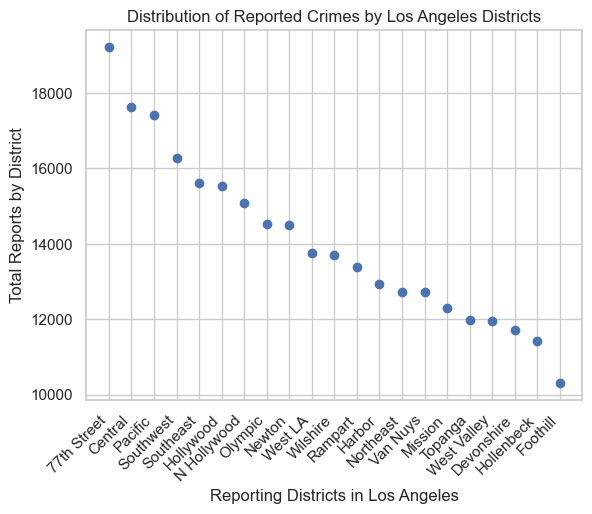

In [340]:
#Creates a scatter plot
plt.scatter(area_crime_counts['area_name'], area_crime_counts['total_reports'])

#Labels and title
plt.xlabel('Reporting Districts in Los Angeles')
plt.ylabel('Total Reports by District')
plt.title('Distribution of Reported Crimes by Los Angeles Districts')
plt.xticks(rotation=45, ha='right')
plt.show()

>Average of crime reports by hours of the day. Scatterplot depicts distribution of reports according to time of day.

In [341]:
#Extracts the hour from the date column
df_crime['hour'] = df_crime['time'].apply(lambda t: t.hour)

#Groups hours together
df_crime['hour_bucket'] = df_crime['hour'].apply(lambda x: f'{x:02}:00')

In [342]:
#Counts total of occurrences per hour
hour_crime_count = df_crime.groupby('hour_bucket').size().reset_index(name='total_hours')

#Calculates averages of reported crimes per hour over fifteen years
hour_crime_count['avg_per_hour'] = hour_crime_count['total_hours'] / years_data

#Sorts the count by descending order
hour_crime_count = hour_crime_count.sort_values(by='avg_per_hour', ascending=False)

print(hour_crime_count)

   hour_bucket  total_hours  avg_per_hour
12       12:00        21208   1413.866667
20       20:00        20282   1352.133333
18       18:00        18231   1215.400000
17       17:00        17959   1197.266667
19       19:00        16787   1119.133333
15       15:00        16761   1117.400000
21       21:00        16491   1099.400000
10       10:00        16452   1096.800000
16       16:00        16144   1076.266667
14       14:00        15619   1041.266667
13       13:00        15615   1041.000000
22       22:00        15499   1033.266667
23       23:00        14428    961.866667
11       11:00        13657    910.466667
8        08:00        10856    723.733333
9        09:00        10672    711.466667
3        03:00         8509    567.266667
7        07:00         7305    487.000000
4        04:00         6467    431.133333
6        06:00         6033    402.200000
5        05:00         5707    380.466667
2        02:00         2241    149.400000
1        01:00         1477     98

In [343]:
df_crime['total_reports'] = df_crime.groupby(['area_name', 'hour_bucket'])['report_id'].transform('count')

In [344]:
# Calculates the total number of reports per area and day of the year
df_crime['total_hours'] = df_crime.groupby(['area_name', 'hour_bucket'])['report_id'].transform('count')

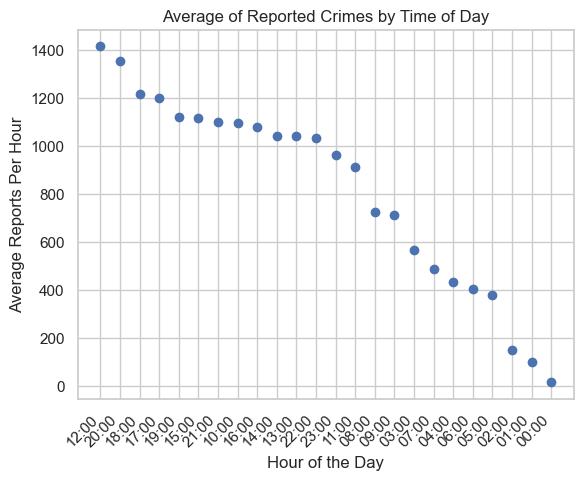

In [345]:
#Creates a scatter plot
plt.scatter(hour_crime_count['hour_bucket'], hour_crime_count['avg_per_hour'])

#Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Reports Per Hour')
plt.title('Average of Reported Crimes by Time of Day')
plt.xticks(rotation=45, ha='right')
plt.show()

>Calculates the coefficient of variation to assess the relative variability in crime rates based on the time of day.

In [346]:
#Calculates the standard deviation
std_dev = hour_crime_count['avg_per_hour'].std()

#Calculates the mean for avg_per_hour
mean = hour_crime_count['avg_per_hour'].mean()

#Calculates the coefficient of variation
cv = (std_dev / mean) * 100

print("Standard Deviation:", std_dev)
print("Mean:", mean)
print("Coefficient of Variation (CV):", cv, "%")

Standard Deviation: 408.4955566154388
Mean: 818.3888888888888
Coefficient of Variation (CV): 49.91460198953159 %


>Averages of total crime reports by days of the year. Scatterplot depicts distribution of reports according to time of year.

In [347]:
#Converts date_reported to datetime64 datatype
df_crime['date_reported'] = pd.to_datetime(df_crime['date_reported'], errors='coerce')

#Groups dates by days
df_crime['day_bucket'] = df_crime['date_reported'].dt.strftime('%m-%d')

#Counts total entires for each day
day_crime_count = df_crime.groupby('day_bucket').size().reset_index(name='total_days')

#Finds the average of reported crimes per day of the year
years_data = 15
day_crime_count['avg_per_day'] = day_crime_count['total_days'] / years_data

#Sorts count of days by descending order
day_crime_count = day_crime_count.sort_values(by='total_days', ascending=False)

#Removes truncating
pd.set_option('display.max_rows', None)

print(day_crime_count)

    day_bucket  total_days  avg_per_day
54       02-24         987    65.800000
194      07-13         980    65.333333
166      06-15         970    64.666667
173      06-22         962    64.133333
180      06-29         958    63.866667
161      06-10         954    63.600000
61       03-02         945    63.000000
48       02-18         944    62.933333
167      06-16         944    62.933333
33       02-03         940    62.666667
175      06-24         929    61.933333
169      06-18         926    61.733333
292      10-19         924    61.600000
12       01-13         922    61.466667
341      12-07         920    61.333333
70       03-11         916    61.066667
176      06-25         913    60.866667
124      05-04         908    60.533333
187      07-06         908    60.533333
21       01-22         907    60.466667
26       01-27         906    60.400000
52       02-22         906    60.400000
138      05-18         906    60.400000
28       01-29         905    60.333333


In [348]:
# Calculates the total number of reports per area and day of the year
df_crime['total_days'] = df_crime.groupby(['area_name', 'day_bucket'])['report_id'].transform('count')

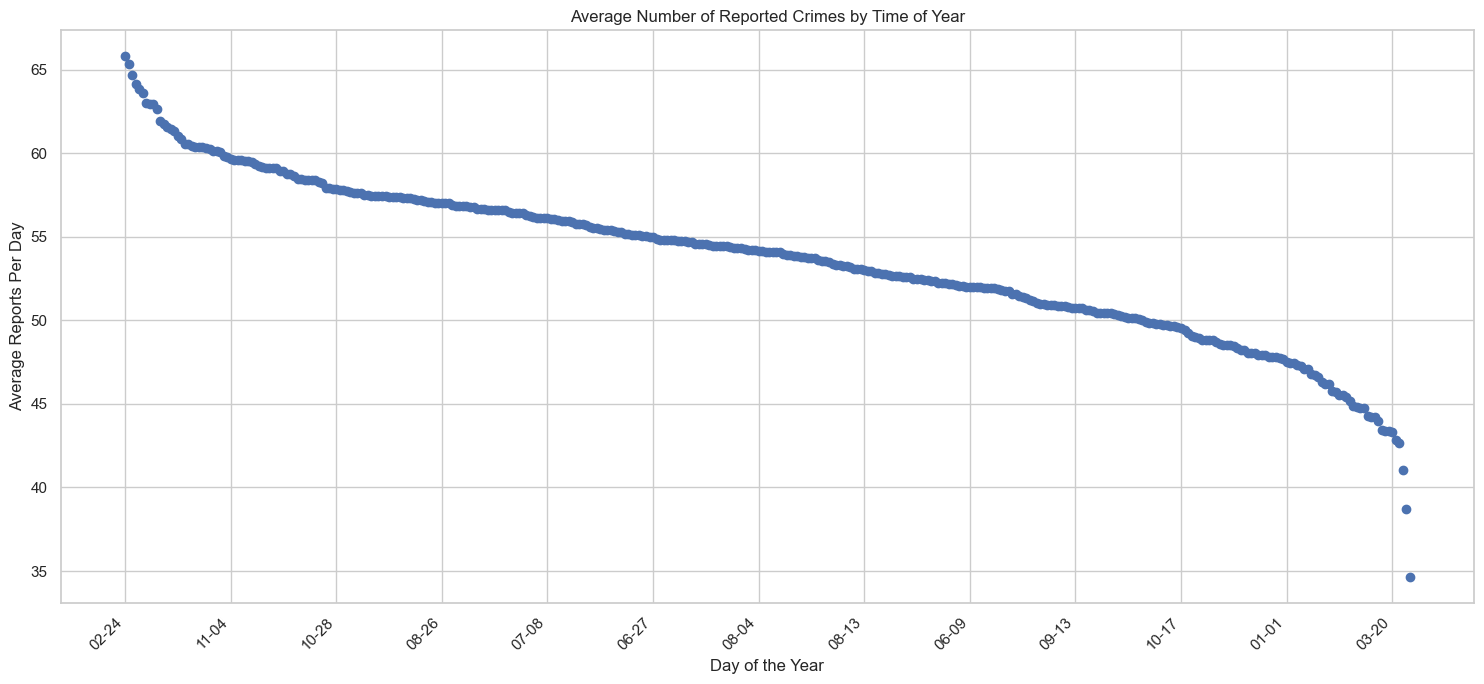

In [349]:
#Creates a scatterplot charted by time
plt.figure(figsize=(15, 7))
plt.scatter(day_crime_count['day_bucket'], day_crime_count['avg_per_day'])
plt.xticks(day_crime_count['day_bucket'][::30], rotation=45, ha='right')
plt.xlabel('Day of the Year')
plt.ylabel('Average Reports Per Day')
plt.title('Average Number of Reported Crimes by Time of Year')
plt.tight_layout()
plt.show()

>Calculates the coefficient of variation to assess the relative variability in crime rates based on the day of the year.

In [350]:
#Calculates the standard deviation
std_dev = day_crime_count['avg_per_day'].std()

#Calculates the mean for avg_per_hour
mean = day_crime_count['avg_per_day'].mean()

#Calculates the coefficient of variation
cv = (std_dev / mean) * 100

print("Standard Deviation:", std_dev)
print("Mean:", mean)
print("Coefficient of Variation (CV):", cv, "%")

Standard Deviation: 4.725321828603604
Mean: 53.66484517304189
Coefficient of Variation (CV): 8.805246364480954 %


>Average crime reports by geographical area of Los Angeles and hour of the day.

In [351]:
#Groups reports of crimes by area and hour of the day and counts the total
area_by_hour = df_crime.groupby(['area_name', 'hour_bucket']).size().reset_index(name='total_reports')

#Calculates averages of reported crimes per hour and area over 15 years
area_by_hour['avg_per_hour'] = area_by_hour['total_reports'] / years_data

#Sorts the results by area name and hour bucket
area_hour_count = area_by_hour.sort_values(by='avg_per_hour', ascending=False)

print(area_hour_count)

       area_name hour_bucket  total_reports  avg_per_hour
20   77th Street       20:00           1357     90.466667
300      Pacific       12:00           1271     84.733333
12   77th Street       12:00           1219     81.266667
36       Central       12:00           1203     80.200000
308      Pacific       20:00           1186     79.066667
17   77th Street       17:00           1171     78.066667
18   77th Street       18:00           1167     77.800000
44       Central       20:00           1162     77.466667
156    Hollywood       12:00           1135     75.666667
204  N Hollywood       12:00           1133     75.533333
21   77th Street       21:00           1131     75.400000
356    Southeast       20:00           1113     74.200000
15   77th Street       15:00           1105     73.666667
492     Wilshire       12:00           1089     72.600000
372    Southwest       12:00           1089     72.600000
380    Southwest       20:00           1087     72.466667
306      Pacif

>Average reported crimes by geographical areas of Los Angeles and day of the year.

In [352]:
# Group reports of crimes by area and day of the year and count the total
area_by_day = df_crime.groupby(['area_name', 'day_bucket']).size().reset_index(name='day_reports')

# Calculate the total number of reports per area and day of the year
total_reports_per_area_day = area_by_day.groupby(['area_name', 'day_bucket'])['day_reports'].sum().reset_index(name='total_reports')

# Calculate the average number of reports per day for each area and day of the year over 15 years
years_data = 15
total_reports_per_area_day['avg_per_day'] = total_reports_per_area_day['total_reports'] / years_data

# Sort the DataFrame by average number of reports per day in descending order
area_day_summary_sorted = total_reports_per_area_day.sort_values(by='avg_per_day', ascending=False)

# Remove truncation
pd.set_option('display.max_rows', None)

# Print the sorted DataFrame
print(area_day_summary_sorted)

        area_name day_bucket  total_reports  avg_per_day
516       Central      05-30            125     8.333333
667       Central      10-28             90     6.000000
3254  N Hollywood      11-22             84     5.600000
7353     Wilshire      02-03             80     5.333333
3763    Northeast      04-13             79     5.266667
43    77th Street      02-13             77     5.133333
7470     Wilshire      05-30             76     5.066667
651       Central      10-12             76     5.066667
674       Central      11-04             75     5.000000
2949  N Hollywood      01-22             74     4.933333
621       Central      09-12             74     4.933333
237   77th Street      08-25             73     4.866667
421       Central      02-25             73     4.866667
241   77th Street      08-29             73     4.866667
4565      Pacific      06-22             73     4.866667
19    77th Street      01-20             73     4.866667
243   77th Street      08-31   

>Calculates the Pearson correlation coefficient for time of day and day of year.

In [353]:
#Aggregates count of records by hours
hourly_reports = df_crime.groupby('hour_bucket')['report_id'].count().reset_index(name='total_hourly_reports')

#Computes the correlation coefficient for time of day
hourly_corr = hourly_reports['total_hourly_reports'].corr(hourly_reports['total_hourly_reports'])

print("Pearson Correlation Coefficient for Time of Day")
print(hourly_corr)

Pearson Correlation Coefficient for Time of Day
0.9999999999999999


In [354]:
#Aggregates count of records by days
daily_reports = df_crime.groupby('day_bucket')['report_id'].count().reset_index(name='total_reports_day')

#Computes the correlation coefficient for day of the year
daily_correlation = daily_reports['total_reports_day'].corr(daily_reports['total_reports_day'])

print("Pearson Correlation Coefficient for Day of Year:")
print(daily_correlation)

Pearson Correlation Coefficient for Day of Year:
1.0


>Creating columns with averages for use in Tableau.

In [355]:
# Calculates the total number of reports per hour
hour_totals = df_crime.groupby('hour_bucket').size()

# Calculates average reports per hour
avg_per_hour = hour_totals / years_data

# Creates a new column in df_crime with avg_per_hour
df_crime['avg_per_hour'] = df_crime['hour_bucket'].map(avg_per_hour)

In [356]:
# Calculates the total number of reports per day
day_totals = df_crime.groupby('day_bucket').size()

# Calculates average reports per day
avg_per_day = day_totals / years_data

# Creates a new column in df_crime with avg_per_day
df_crime['avg_per_day'] = df_crime['day_bucket'].map(avg_per_day)

In [357]:
#Saves transformed data to csv file
df_crime.to_csv('crime_analysis.csv', index=False)

## Findings<a id="findings"></a>

>The descriptive analysis indicates that historically, the most frequent times for reported crimes across Los Angeles are at 12:00 PM, 10:00 PM, and between 5:00 PM to 7:00 PM. The specific dates of February 24, July 13, and June 15, 22, and 29 have consistently seen the highest number of reported crimes across the city.

>When analyzing the data by LAPD police districts, distinct patterns emerged. Districts such as 77th Street, Central, Pacific, and Southwest reported the highest overall crime rates. The period from 12:00 PM to 10:00 PM consistently saw the most crime reports across all districts, although peak crime times throughout the year varied by district.

>In the Central district, May 30 had the highest number of reported crimes. The 77th Street district saw the most reported crimes on February 13. In the Pacific district, June 22 had the highest crime reports, while the Southwest district experienced the most reported crimes on November 1. The peak days of the year for reported crimes varied significantly depending on the reporting district.

>When computing the coefficient of variation for the time of day, the CV value was 49.91%. This indicates high relative variability in crime rates based on the time of day. The suggests the alternative hypothesis is correct, crime rates do vary based on time of day.

>When computing the coefficient of variation for the day of the year, the CV value was 8.81%. This indicates low relative variability in crimes rates based on day of the year. This suggests the null hypothesis is correct, crime rates do not vary based on day of the year.

>In summary, there is a strong linear relationship between crime rates and time of day and year. There is high variability in crime rates based on time of day and low variability in crime rates based on day of the year. The time period from 12:00 PM to 10:00 PM experiences more reported crimes across all reporting districts than any other time period in Los Angeles. Additionally, February and June are the months with the highest number of reported crimes citywide.

> For additional graphs depicting reported crimes by area of Los Angeles and time, follow the link: https://public.tableau.com/app/profile/kaley.savage3007/viz/LAPDReportedCrimesbyDistrictandTime/Story1?publish=yes

>The box plot below illustrates the distribution of daily reports across various areas of Los Angeles, highlighting the averages and outliers for each reporting district.

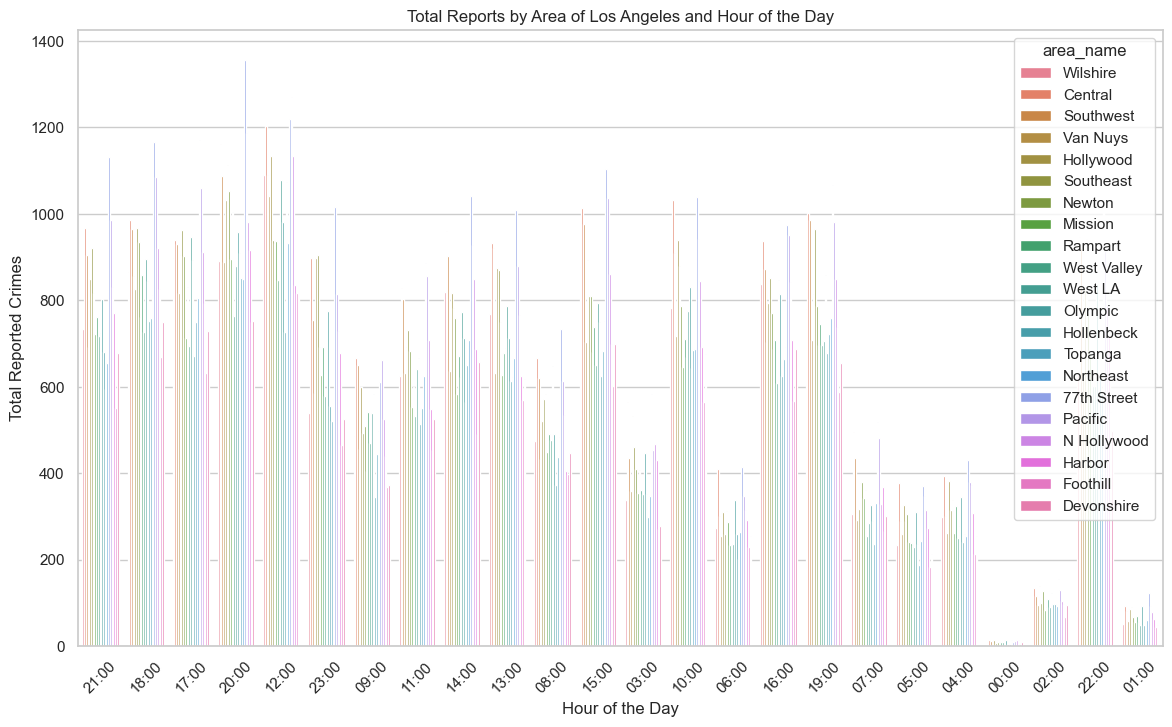

In [358]:
# Sets the style of the plots
sns.set(style="whitegrid")

# Creates a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=df_crime,
    x='hour_bucket',
    y='total_reports',
    hue='area_name',
    palette='husl'
)

#Sets title and labels
plt.title('Total Reports by Area of Los Angeles and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Reported Crimes')
plt.xticks(rotation=45)
plt.show()

>The box plot below illustrates the distribution of hourly reports across various areas of Los Angeles, highlighting the averages and outliers for each reporting district.

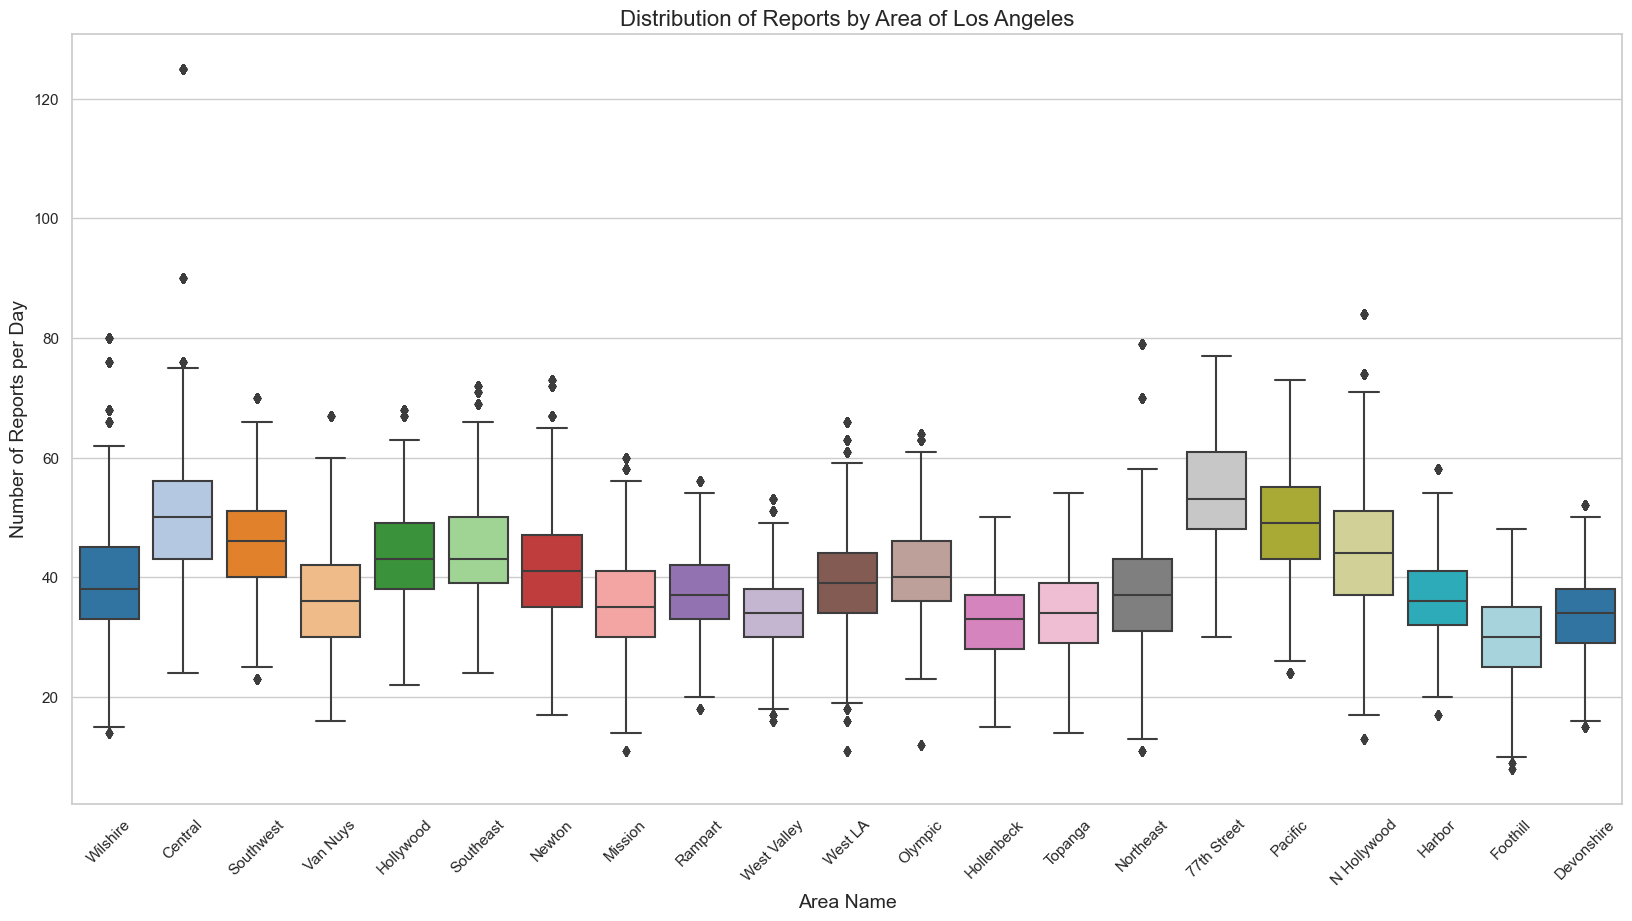

In [359]:
#Merges dataframes for boxplot
df_crime = df_crime.merge(area_by_day, on=['area_name', 'day_bucket'], how='left')

#Creates a box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_crime, x='area_name', y='day_reports', palette='tab20')

#Title, labels, and legend
plt.title('Distribution of Reports by Area of Los Angeles', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Number of Reports per Day', fontsize=14)
plt.xticks(rotation=45)
plt.show()

>The box plot below depicts the distribution of reports per hour across various areas of Los Angeles. One can clearly see the averages and outliers for each reporting district.

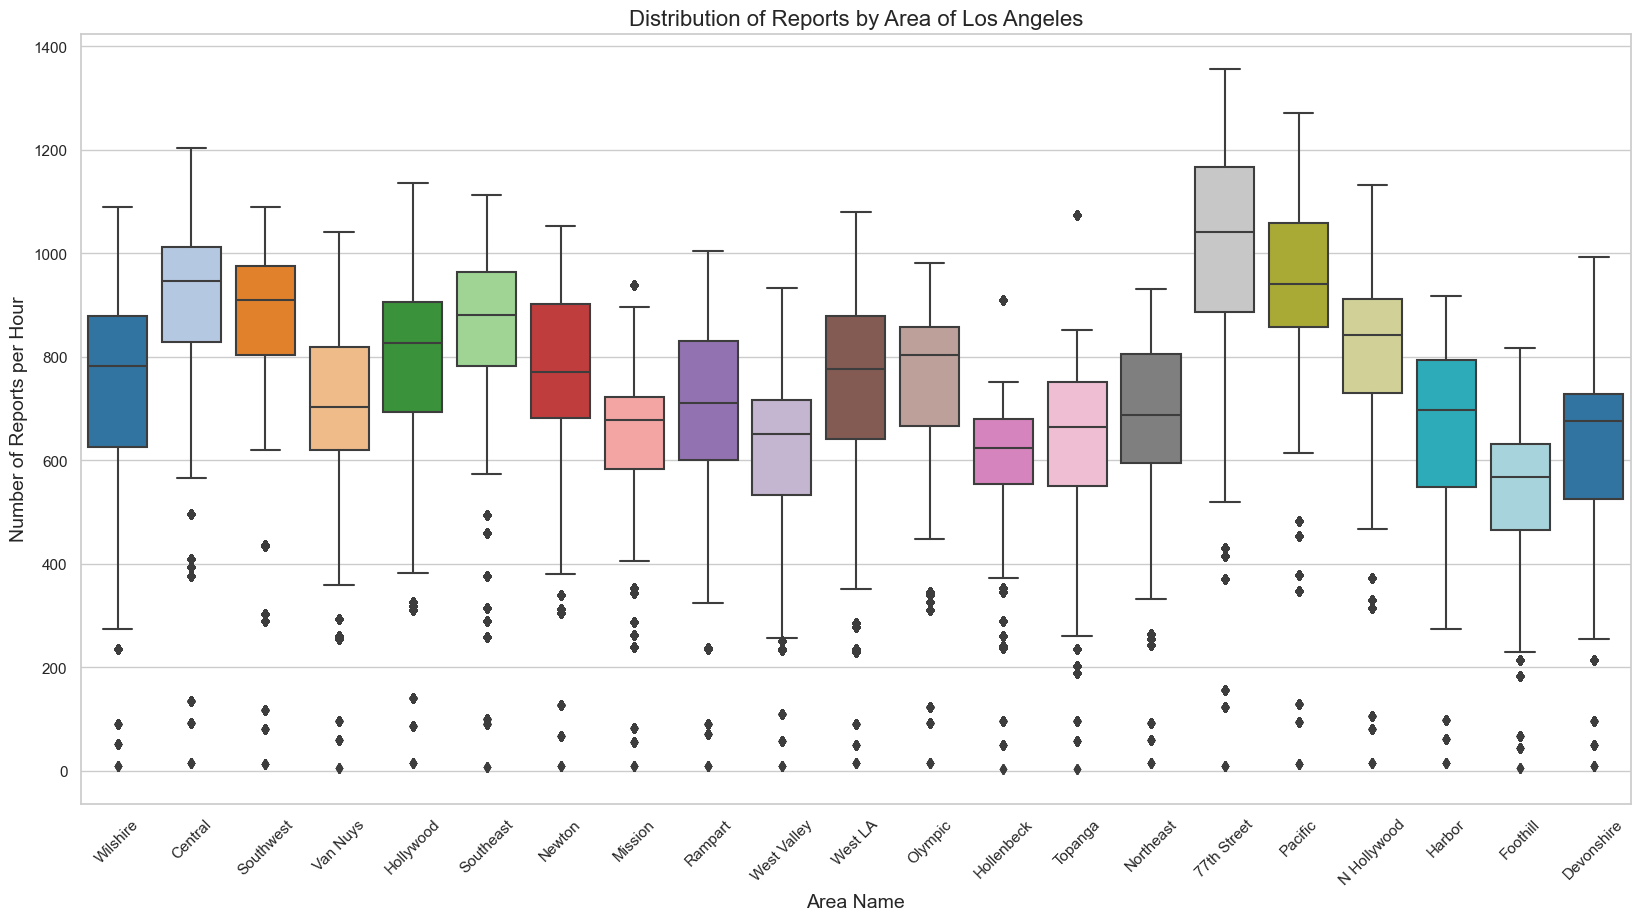

In [360]:
#Creates a box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_crime, x='area_name', y='total_reports', palette='tab20')

#Title, labels, and legend
plt.title('Distribution of Reports by Area of Los Angeles', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Number of Reports per Hour', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Limitations<a id="limitations"></a>

>There are several limitations to the data, methodology, and analysis. The consistency of the data could have been affected by changes in reporting practices, definitions of crime categories, and data collection methods over the past fifteen years. These changes could create inaccuracies in the averages of reported crimes.

>The methodology does not investigate crime rates variances by seasons or years. It is plausible that crime rates do vary by seasons of the year or over the years as population demographics change in Los Angeles.

>The analysis does not prove causation, only correlation between crime rates and times of the day and year. Various law enforcement policies, economic downturns, and social intervention could cause shifts in the times and days crimes are reported. 

>The analysis is descriptive, not predictive. The analysis aims to identify historical trends in reported crimes rather than predict future crime trends. Predictive modeling is beyond the scope of the analysis.

## Recommendations<a id="recommendations"></a>

>Based on the descriptive analysis, we recommend that LAPD reallocate their staffing based upon time of day, year, and reporting district. We recommend LAPD increase staffing levels between 12:00 PM and 11:00 PM each day, with the highest number of officers deployed at 12:00 PM and 8:00 PM. Conversely, staffing levels should be reduced between 12:00 AM and 11:00 AM, as crime rates during this period are significantly lower.

>Additionally, we advise LAPD to adjust staffing levels based on the average number of reported crimes for each day. Staffing should be slightly increased on days with higher average crime rates and slightly decreased on days with lower average crime rates.

>Furthermore, it is recommended that LAPD allocate more officers to reporting districts with higher crime rates, such as Central, Pacific, Southwest, Southeast, and Hollywood. Conversely, districts with lower crime rates, such as Devonshire, Hollenbeck, and Foothill, should see a reduction in staffing levels.

## Conclusion<a id="conclusion"></a>

>In conclusion, the analysis revealed a strong linear relationship between crime rates and time of day or year. There is high variability in crime rates based on time of day and low variability in crime rates based on day of the year.

>The descriptive analysis revealed several trends regarding crime in Los Angeles. The 77th Street, Central, Pacific, and Southwest LAPD reporting districts recorded the highest number of reported crimes. The period from 12:00 PM to 10:00 PM consistently had the most reported crimes across all districts. However, the peak days of the year for reported crimes varied significantly by district.

>Based upon the findings of the analysis, it is reasonable to assume the alternative hypothesis is accurate: crime rates do vary significantly based upon the time of day. Therefore, we recommend LAPD adjust staffing allocation to account for these variances across reporting districts, time of day, and throughout the year to ensure prompt response to reported crimes.